# <center><span style="color:#D38F00"><u>PROJET FINAL:<br/> Sylvie Jarjayes</u></span></center>

L'objectif de ce projet est de prédire la consommation électrique des départements de France.

Le point de départ est le fichier csv qui donne la consommation totale par commune, auque on aggrège des données de population et des données de tourisme.

Dans un premier temps, il s'agit d'analyser les différentes données, la forme des distributions par exemple, puis on cherche à valider des corrélations entre la target et les variables, ce qui permet de sélectionner les variables les plus pertinentes.

La dernière étape consiste à mettre en oeuvre des algorithmes de ML afin de prédire la consommation totale par commune en fonction des variables d'intérêt. La qualité de la prédiction est estimée à partir de la RMSE.
 

# <span style="color:#011C5D">1 Import et nettoyage des données </span>

Les données doivent se trouver dans le répertoire du Notebook.
Des données de géolocalisation - latitude et longitude - sont agrégées au dataframe initial.

## <span style="color:#011C5D">1.1 Import des librairies </span>


In [186]:
import numpy as np
import pandas as pd

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import os

import statsmodels.formula.api as smf

from sklearn.metrics import mean_absolute_error, median_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.compose import make_column_transformer

from sklearn.preprocessing import QuantileTransformer

from sklearn.linear_model import RidgeCV


from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import plot_tree

from sklearn.model_selection import cross_validate


from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeRegressor

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, FunctionTransformer

from scipy import stats

from sklearn.preprocessing import PowerTransformer

from scipy.special import boxcox, inv_boxcox

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import ShuffleSplit

In [2]:
#!pip install imperio
from imperio import BoxCoxTransformer

## <span style="color:#011C5D">1.2 Options d'affichage </span>


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings("ignore")

## <span style="color:#011C5D">1.3 Liste des fichiers disponibles</span>
    
   

In [ ]:
# Liste des fichiers du répertoire courant
os.listdir()


# <span style="color:#011C5D"> 2. Import données de conso et premières analyses</span>

In [5]:
# Import des datas de consommation
data=pd.read_csv( 'conso-elec-agregee-commune-france.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36145 entries, 0 to 36144
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdla                         36145 non-null  int64  
 1   nombre_maille_secretisees_a  36145 non-null  int64  
 2   indquala                     36145 non-null  float64
 3   nombre_maille_secretisees_i  36145 non-null  int64  
 4   indquali                     36145 non-null  float64
 5   nombre_maille_secretisees_t  36145 non-null  int64  
 6   indqualt                     36145 non-null  float64
 7   nombre_maille_secretisees_r  36145 non-null  int64  
 8   indqualr                     36145 non-null  float64
 9   partr                        36145 non-null  float64
 10  pdlna                        36145 non-null  int64  
 11  indqualna                    36145 non-null  float64
 12  code_commune                 36145 non-null  object 
 13  libelle_commune 

In [ ]:
data.head()

In [6]:
# Etude des différentes filières
data['id_filiere'].value_counts()
#La variable id_filiere est inutile car on n'a qu'une seule valeur.

100    36145
Name: id_filiere, dtype: int64

In [7]:
# Suppression des lignes pour lesquelles la consommation est  nulle
#data['consototale'].value_counts()
data = data[data['consototale']>0]
#data['consototale'].value_counts()

In [8]:
# Creation d'un code commune numérique: remplacement 2A par 200 et 3B par 300 (corse)
data['code_commune_num']=data['code_commune'].astype(str)
data['code_commune_num'] =data['code_commune_num'] .str.replace('2A','200')
data['code_commune_num'] =data['code_commune_num'] .str.replace('2B','300')
data['code_commune_num']=data['code_commune_num'].astype(int)

# Suppression des doublons en se basant sur le code_commune
data=data.drop_duplicates(subset=['code_commune'], keep='last')

#data.info()

In [ ]:
#print(f"Voici la liste des codes numériques des communes: {data['code_commune_num'].sort_values()}.")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35289 entries, 0 to 36144
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdla                         35289 non-null  int64  
 1   nombre_maille_secretisees_a  35289 non-null  int64  
 2   indquala                     35289 non-null  float64
 3   nombre_maille_secretisees_i  35289 non-null  int64  
 4   indquali                     35289 non-null  float64
 5   nombre_maille_secretisees_t  35289 non-null  int64  
 6   indqualt                     35289 non-null  float64
 7   nombre_maille_secretisees_r  35289 non-null  int64  
 8   indqualr                     35289 non-null  float64
 9   partr                        35289 non-null  float64
 10  pdlna                        35289 non-null  int64  
 11  indqualna                    35289 non-null  float64
 12  code_commune                 35289 non-null  object 
 13  libelle_commune 

In [10]:
# Suppression des codes inutiles

data.drop(['code_commune', 'libelle_commune','code_region','libelle_region','id_filiere','code_postal','code_epci','libelle_epci'], 
          inplace=True, axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35289 entries, 0 to 36144
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdla                         35289 non-null  int64  
 1   nombre_maille_secretisees_a  35289 non-null  int64  
 2   indquala                     35289 non-null  float64
 3   nombre_maille_secretisees_i  35289 non-null  int64  
 4   indquali                     35289 non-null  float64
 5   nombre_maille_secretisees_t  35289 non-null  int64  
 6   indqualt                     35289 non-null  float64
 7   nombre_maille_secretisees_r  35289 non-null  int64  
 8   indqualr                     35289 non-null  float64
 9   partr                        35289 non-null  float64
 10  pdlna                        35289 non-null  int64  
 11  indqualna                    35289 non-null  float64
 12  code_departement             35289 non-null  object 
 13  libelle_departem

## <span style="color:#011C5D">2.1 Visualisation des variables: consommation et autres variables </span>

In [13]:
# Sélection des variables numériques et catégorielles
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)

### <span style="color:#011C5D">2.1.1 Boxplot: consommation et autres variables </span>

In [20]:
# Examen des outliers: confirmation distributions très étendues

def plot_box(data):
    
    temp_num_col=list(data.columns)
    ncols = 3
    nrows = 5
 

    fig, axes = plt.subplots(nrows, ncols, figsize=(30, 40))

    plt.subplots_adjust(hspace=0.5)

    plt.suptitle("Outliers des \nvariables continues", fontsize=18, y=0.95)

    for n, col in enumerate(temp_num_col): 
        ax = plt.subplot(nrows, ncols, n + 1)
        temp.boxplot(column=col, ax=ax, color='red')
        
    
    #axes[1,3].set_axis_off()


In [21]:
# Choix des variables à tracer puis affichage des boxplots
num_col=num_selector(data)
#temp = pd.concat([y, X_tr[num_col].drop(columns=['id'])], axis=1)
temp = data[num_col]
temp.drop(columns=['consototale'], axis=1, inplace=True)
temp.head()

pdla  nombre_maille_secretisees_a  indquala  nombre_maille_secretisees_i  \
0    12                            0     0.420                            1   
1    12                            0     0.564                            0   
2    33                            0     0.621                            0   
3     0                            1     0.000                            1   
4    14                            0     0.560                            1   

   indquali  nombre_maille_secretisees_t  indqualt  \
0     0.000                            0     0.194   
1     0.487                            0     0.449   
2     0.510                            0     0.447   
3     0.000                            1     0.000   
4     0.000                            0     0.479   

   nombre_maille_secretisees_r  indqualr  partr  pdlna  indqualna  \
0                            0     0.451  0.000     12      0.330   
1                            0     0.503  0.000     55      0.435   
2                            0     0.576  0.000     81      0.478   
3                            0     0.580  0.000     15      0.512   
4                            0     0.461  0.000     14      0.536   

   code_commune_num  
0             34152  
1             34163  
2             34194  
3             34208  
4             34221

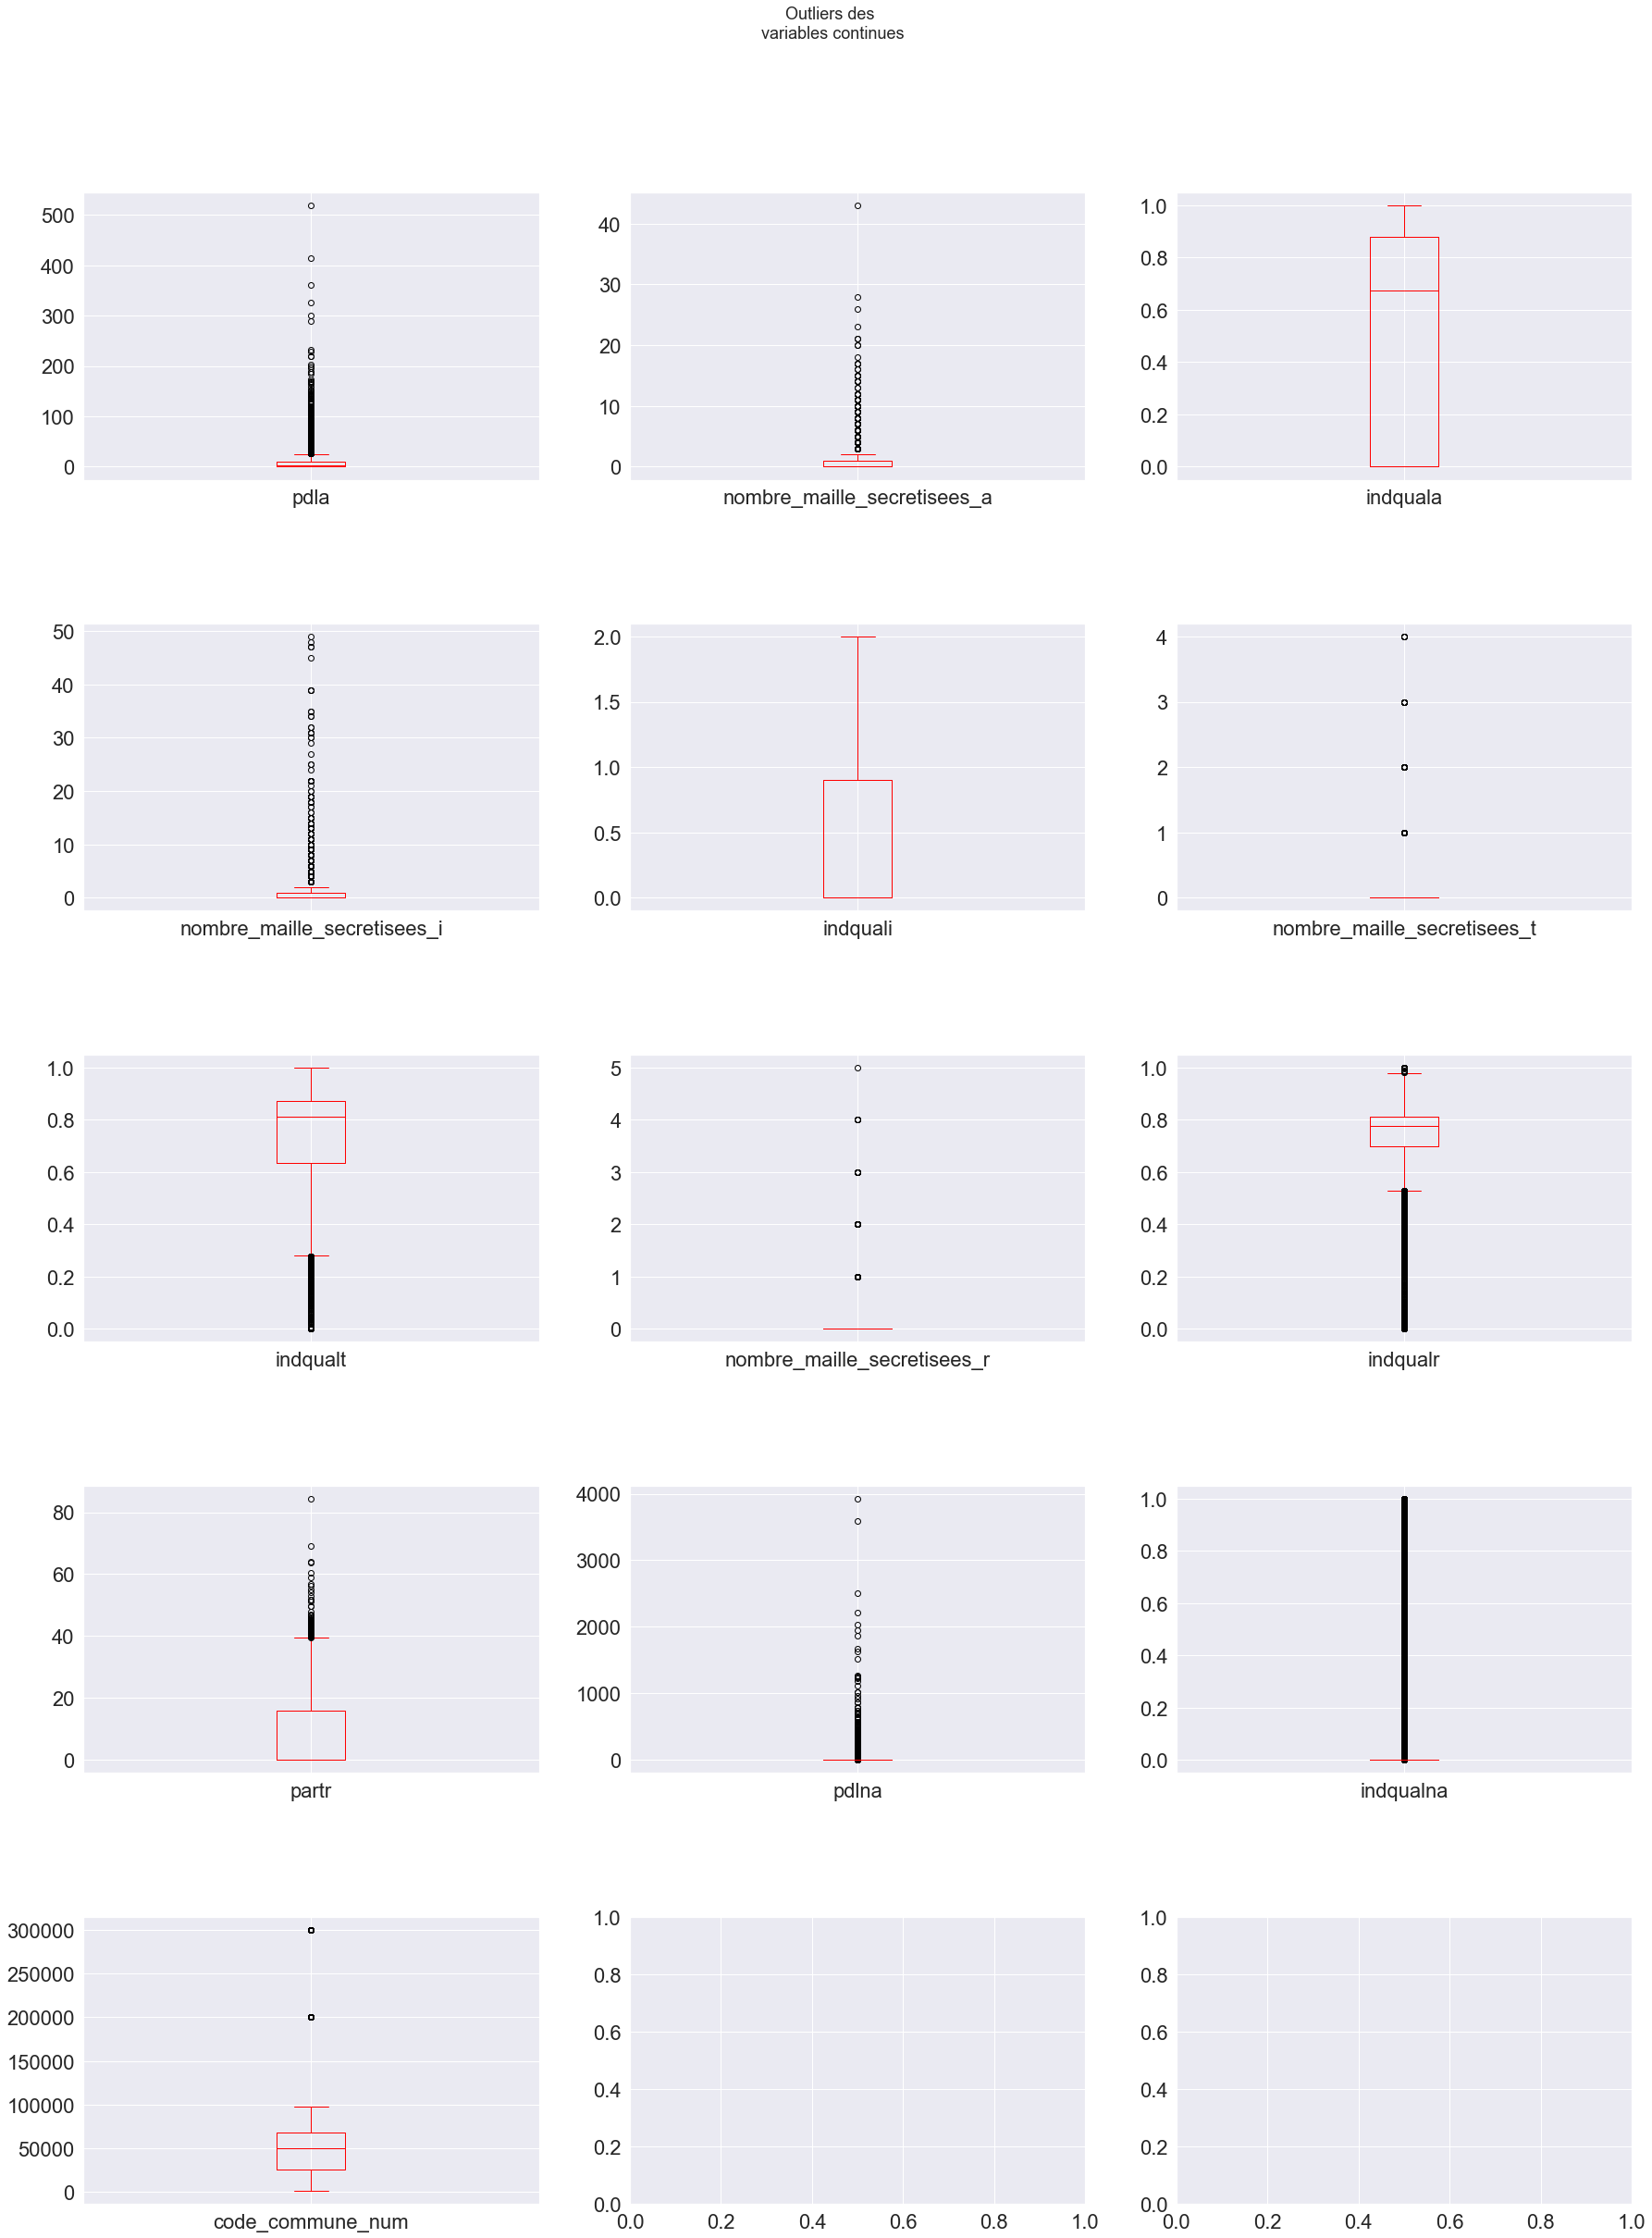

In [22]:
# Tracé
sns.set(font_scale=2, palette='deep')
plot_box(temp)

In [ ]:
data.columns

### <span style="color:#011C5D"> 2.1.2 Création de la variable nombre total de mailles </span>

In [23]:
data['nb_maille']=data['nombre_maille_secretisees_i']+data['nombre_maille_secretisees_r']

### <span style="color:#011C5D"> 2.1.3 Distributions consommation et autres variables </span>

Text(0.5, 1.0, 'Consommation totale')

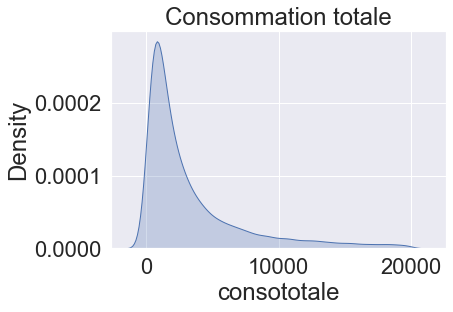

In [24]:
# Distribution de la consommation hors valeurs extrêmes
data_distrib = data[data['consototale']<20000]
ax = plt.subplot()
sns.kdeplot(ax=ax, data=data_distrib['consototale'], legend=None, shade=True)
ax.grid(b=True, which='major', axis='y')
ax.set_title('Consommation totale')

In [ ]:
# Transformation box cox de la conso
original_data = data['consototale'].to_list()
 
# transformation et fit
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# affchage des histogrammes
fig, ax = plt.subplots(1, 2)
 
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="blue", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="blue", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)

fig.suptitle('Transformation box-cox de la target')
 
print(f"valeur lambda pour la transformation de la conso: {fitted_lambda}")

In [ ]:
#dir(fig)

In [ ]:
# Distribution de la consommation hors valeurs extrêmes

ax = plt.subplot()
sns.kdeplot(ax=ax, data=data_distrib['nb_maille'], legend=None, shade=True)
ax.grid(b=True, which='major', axis='y')
ax.set_title('Nombre de mailles')

In [ ]:
# Distribution de pdlna
data_distrib = data['pdlna'][data['pdlna']<30]
ax = plt.subplot()
sns.kdeplot(ax=ax, data=data_distrib, legend=None, shade=True)
ax.grid(b=True, which='major', axis='y')
ax.set_title('Nombre de points secteur inconnu')

In [ ]:
# Distribution de indqualt
data_distrib = data['indqualt']
ax = plt.subplot()
sns.kdeplot(ax=ax, data=data_distrib, legend=None, shade=True)
ax.grid(b=True, which='major', axis='y')
ax.set_title('Indice Qualité tertiaire')

In [ ]:
# Distribution de indqualr
data_distrib = data['indqualr']
ax = plt.subplot()
sns.kdeplot(ax=ax, data=data_distrib, legend=None, shade=True)
ax.grid(b=True, which='major', axis='y')
ax.set_title('Indice Qualité résidentiel')

In [ ]:
# Distribution de pdla
data_distrib = data['pdla'][ data['pdla']<100]
ax = plt.subplot()
sns.kdeplot(ax=ax, data=data_distrib, legend=None, shade=True)
ax.grid(b=True, which='major', axis='y')
ax.set_title('Nombre de points agriculture')

## <span style="color:#011C5D"> 2.2 Corrélations: consommation et autres variables </span>

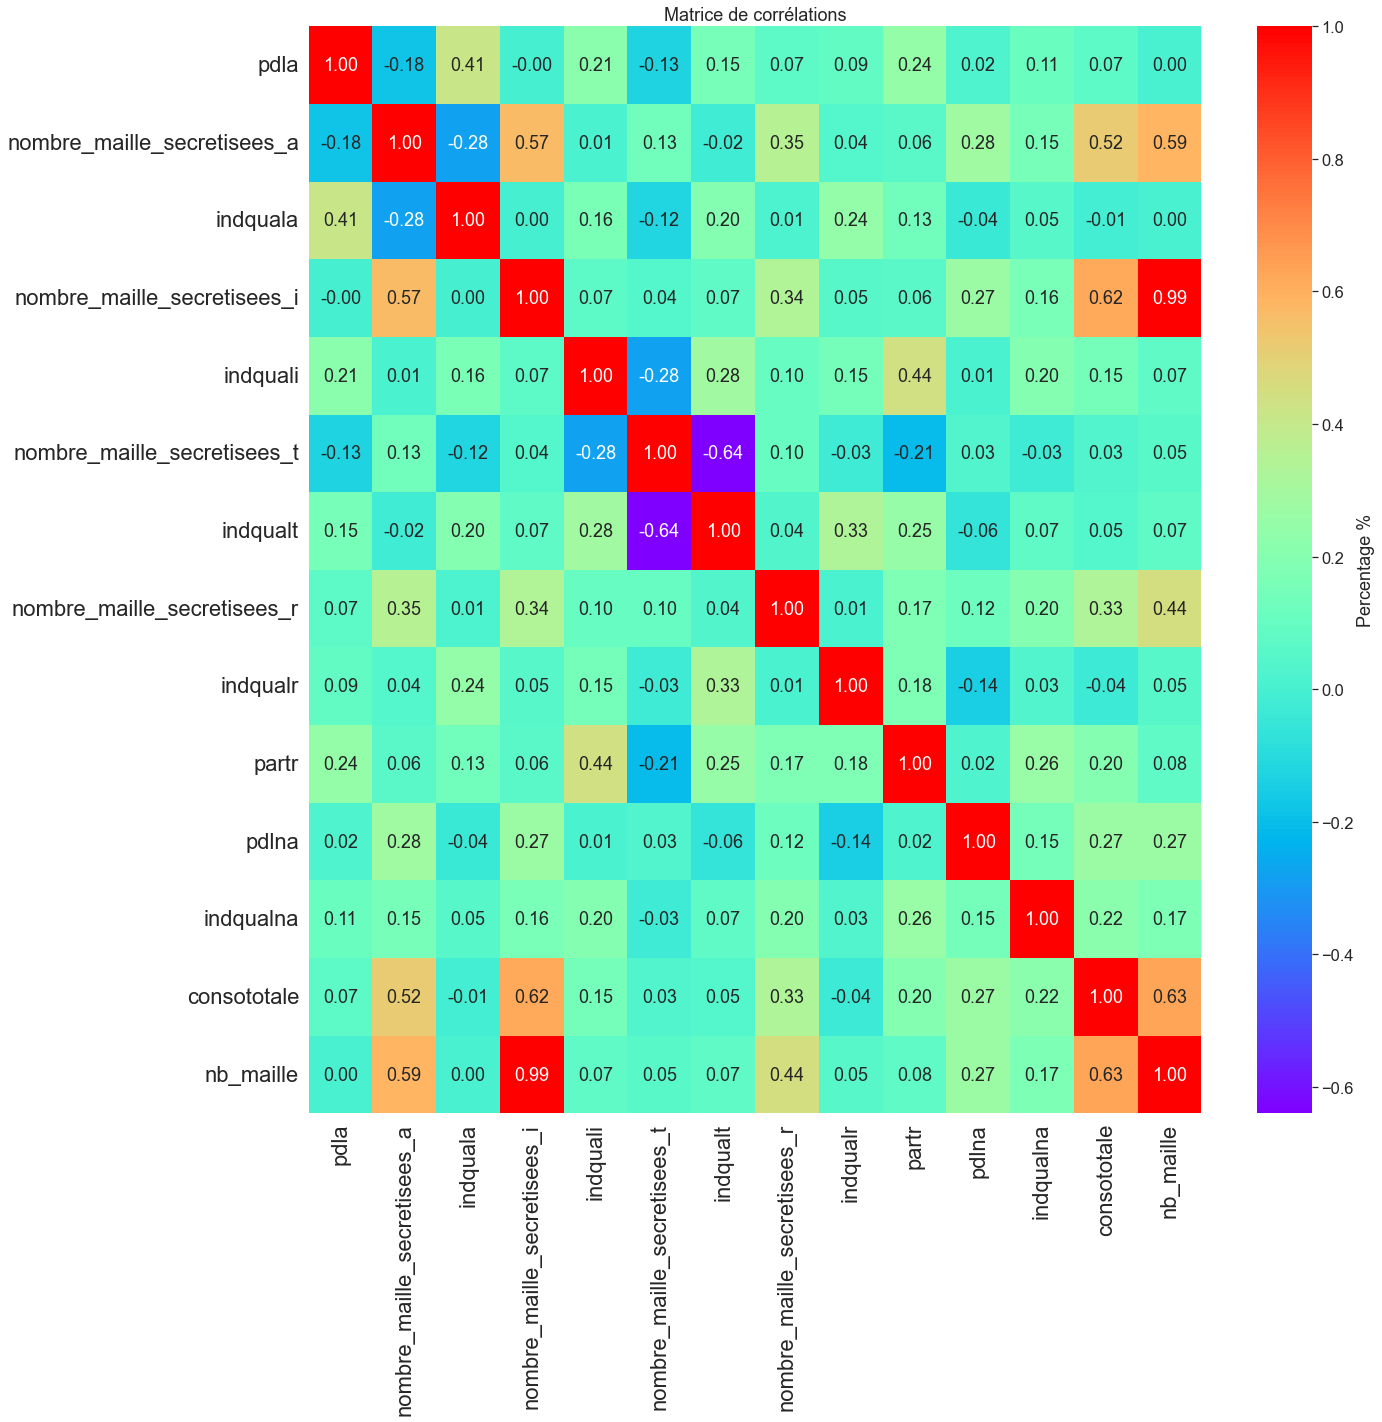

In [25]:
# Visualisation des corrélations

data_study=data.copy()
data_study.drop(columns=['code_commune_num'], axis=1, inplace=True)


f, ax = plt.subplots(figsize=[20,20])
sns.set(font_scale=1.5)
sns.heatmap(data_study.corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'},cmap='rainbow', ax=ax)
ax.set_title("Matrice de corrélations")
plt.show()

## <span style="color:#011C5D"> 2.3 Données géographiques </span>

In [33]:
# Import des codes postaux avec latitude et Longitude
data_loc=pd.read_csv('communes-departement-region.csv.csv')
data_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_commune_INSEE    39201 non-null  object 
 1   nom_commune_postal    39201 non-null  object 
 2   code_postal           39201 non-null  int64  
 3   libelle_acheminement  39201 non-null  object 
 4   ligne_5               3257 non-null   object 
 5   latitude              38932 non-null  float64
 6   longitude             38932 non-null  float64
 7   code_commune          39194 non-null  float64
 8   article               2580 non-null   object 
 9   nom_commune           39201 non-null  object 
 10  nom_commune_complet   39201 non-null  object 
 11  code_departement      39194 non-null  object 
 12  nom_departement       38934 non-null  object 
 13  code_region           38934 non-null  float64
 14  nom_region            38934 non-null  object 
dtypes: float64(4), int6

In [34]:
data_loc = data_loc.drop('code_commune', axis=1)

data_loc.rename(columns={"code_commune_INSEE": "code_commune"}, inplace=True)

#data_loc.tail()


#data_loc.describe()

# Creation d'un code commune numérique: remplacement 2A par 200 et 3B par 300 (corse)
data_loc['code_commune_num']=data_loc['code_commune'].astype(str)
data_loc['code_commune_num'] =data_loc['code_commune_num'] .str.replace('2A','200')
data_loc['code_commune_num'] =data_loc['code_commune_num'] .str.replace('2B','300')
data_loc['code_commune_num']=data_loc['code_commune_num'].astype(int)

data_loc=data_loc[['code_commune_num','latitude','longitude']]

data_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code_commune_num  39201 non-null  int32  
 1   latitude          38932 non-null  float64
 2   longitude         38932 non-null  float64
dtypes: float64(2), int32(1)
memory usage: 765.8 KB


In [36]:
# Suppression des doublons
data_loc=data_loc.drop_duplicates(subset=['code_commune_num'], keep='last')

In [39]:
#data_loc.info()

In [38]:
# Merge data et data_loc
data_geo = data.merge(data_loc, how='left', on='code_commune_num')


data_geo.info()

# Création d'un dataframe comportant les variables d'intérêt à partir de data_full
#data_light=data[['consototale', 'pdla','indqualr','indqualt','pdlna']]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35289 entries, 0 to 35288
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdla                         35289 non-null  int64  
 1   nombre_maille_secretisees_a  35289 non-null  int64  
 2   indquala                     35289 non-null  float64
 3   nombre_maille_secretisees_i  35289 non-null  int64  
 4   indquali                     35289 non-null  float64
 5   nombre_maille_secretisees_t  35289 non-null  int64  
 6   indqualt                     35289 non-null  float64
 7   nombre_maille_secretisees_r  35289 non-null  int64  
 8   indqualr                     35289 non-null  float64
 9   partr                        35289 non-null  float64
 10  pdlna                        35289 non-null  int64  
 11  indqualna                    35289 non-null  float64
 12  code_departement             35289 non-null  object 
 13  libelle_departem

In [40]:
# Visualisation des données en France métropolitaine hors Corse
data_visu=data_geo[data_geo['code_commune_num']<96000]

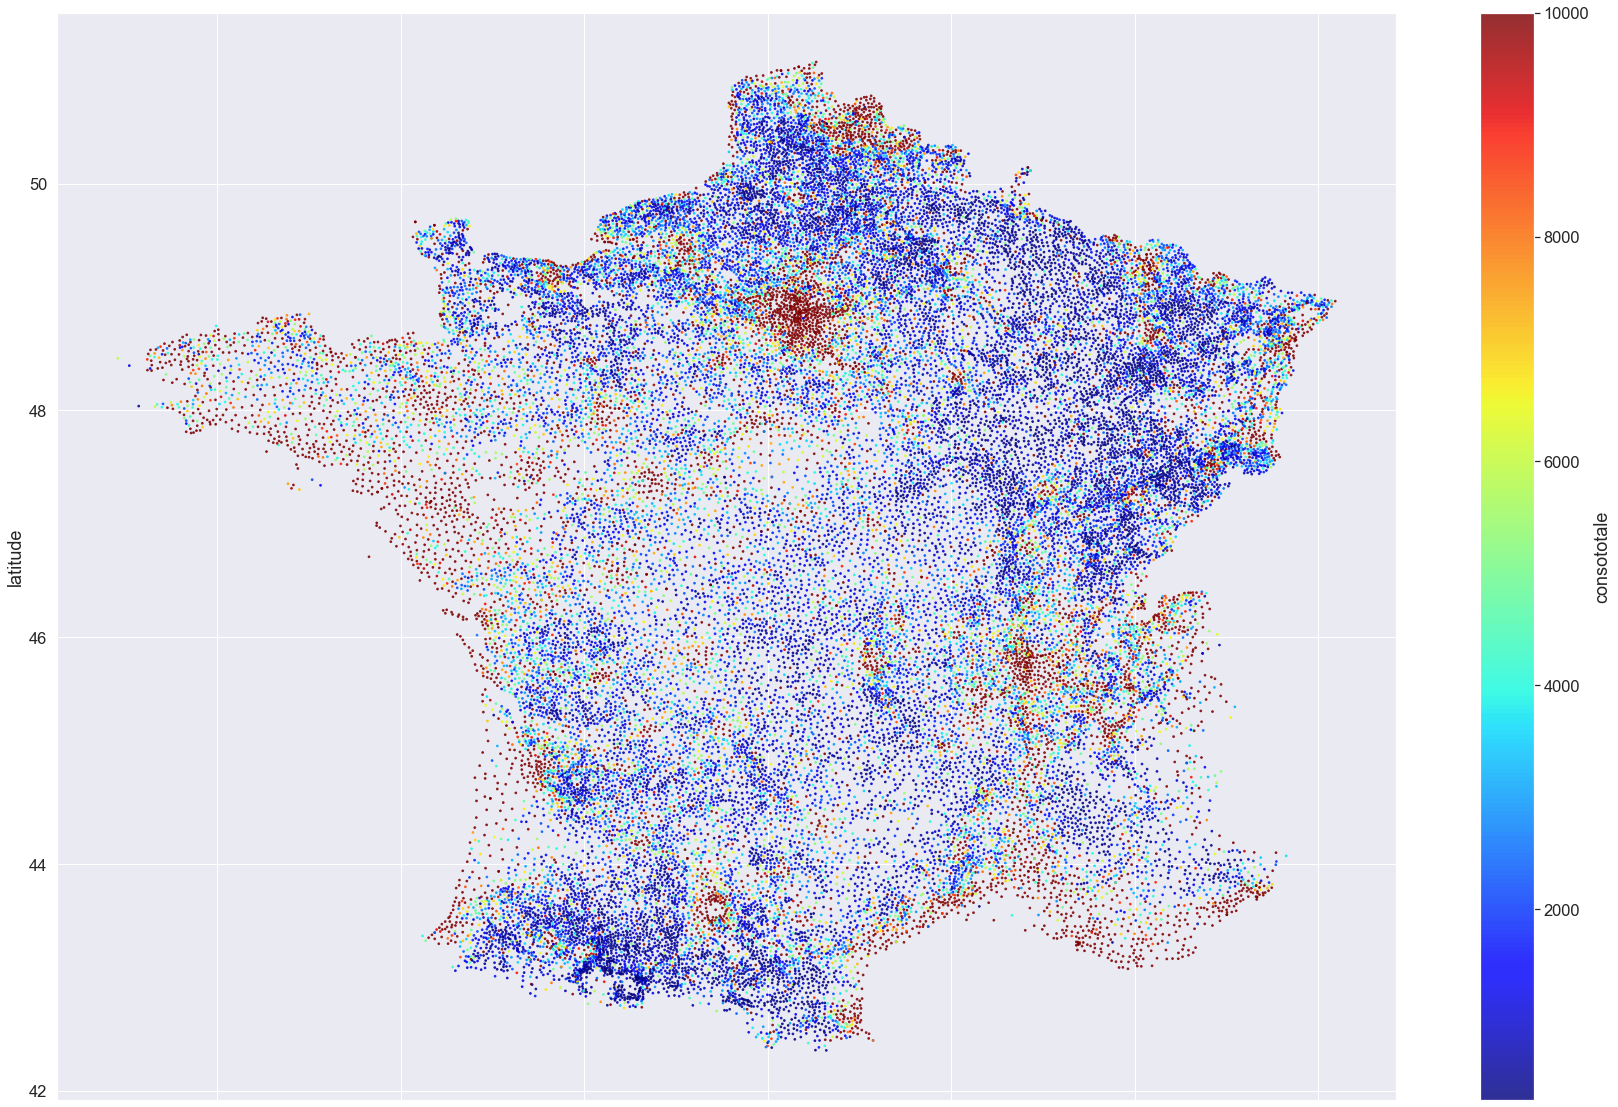

In [41]:
data_visu.plot(kind="scatter", x="longitude", y="latitude",
    s=3, c="consototale", 
                    cmap=plt.get_cmap("jet"),vmax=10000,vmin=300,
                    colorbar=True, alpha=0.8, figsize=(20*105/70,20)
                    )

plt.show()

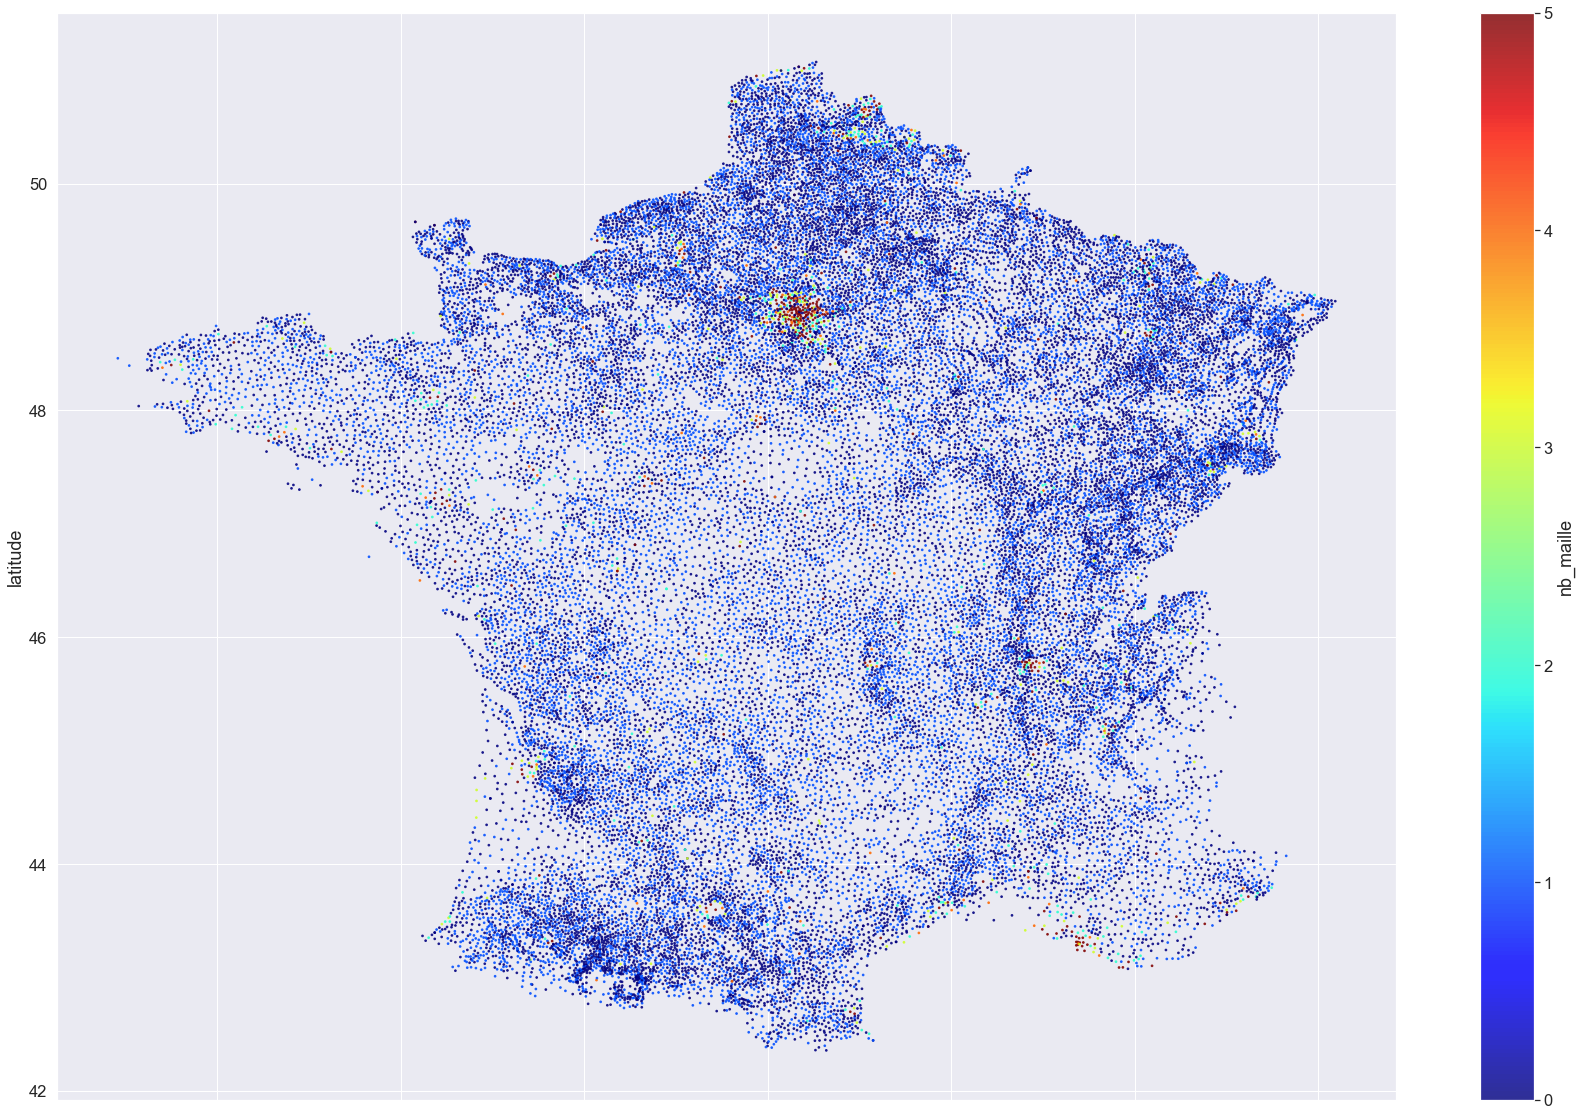

In [42]:
data_visu.plot(kind="scatter", x="longitude", y="latitude",
    s=3, c="nb_maille", 
                    cmap=plt.get_cmap("jet"),vmax=5,vmin=0,
                    colorbar=True, alpha=0.8, figsize=(20*105/70,20)
                    )

plt.show()

# <span style="color:#011C5D">3.  Utilisation des données de population </span>


## <span style="color:#011C5D">3.1 Import et fusion des données </span>

In [43]:
# Import de la feuille 1 du fichier excel
data_pop=pd.read_excel('base-pop-historiques-1876-2019.xlsx', sheet_name=0, header=5)

In [44]:
# Visualisation
data_pop.head()


CODGEO  REG DEP                   LIBGEO  PMUN19  PMUN18  PMUN17  PMUN16  \
0  01001   84  01  L'Abergement-Clémenciat     779     771     776     767   
1  01002   84  01    L'Abergement-de-Varey     256     253     248     243   
2  01004   84  01        Ambérieu-en-Bugey   14134   14204   14035   14081   
3  01005   84  01      Ambérieux-en-Dombes    1751    1720    1689    1671   
4  01006   84  01                  Ambléon     112     112     111     110   

   PMUN15  PMUN14  PMUN13  PMUN12  PMUN11  PMUN10  PMUN09  PMUN08  PMUN07  \
0     767     767     767     777     780     784     787     791     804   
1     241     239     236     235     234     221     207     194     195   
2   14127   14022   14359   14233   13839   13835   13350   12792   12696   
3    1619    1627    1635    1642    1600    1616    1592    1567    1544   
4     109     109     108     110     112     116     120     123     125   

   PMUN06  PSDC99  PSDC90  PSDC82  PSDC75  PSDC68  PSDC62   PTOT54   PTOT36  \
0     811     728     579     477     368     347     407  424.000  506.000   
1     198     168     159     136     106      88     103  157.000  203.000   
2   12709   11436   10455    9737    9550    8949    7748 7159.000 6846.000   
3    1436    1408    1156     848     756     627     588  570.000  593.000   
4     120      86      76      65      82     108     107  111.000  141.000   

   PTOT1931  PTOT1926  PTOT1921  PTOT1911  PTOT1906  PTOT1901  PTOT1896  \
0   540.000   543.000   566.000   560.000   629.000   637.000   572.000   
1   219.000   253.000   256.000   291.000   323.000   357.000   391.000   
2  6794.000  5705.000  4796.000  4334.000  4100.000  4023.000  3548.000   
3   618.000   690.000   698.000   805.000   805.000   835.000   852.000   
4   135.000   161.000   150.000   159.000   193.000   200.000   206.000   

   PTOT1891  PTOT1886  PTOT1881  PTOT1876  
0   594.000   622.000   605.000   604.000  
1   421.000   486.000   490.000   484.000  
2  3635.000  3618.000  3396.000  3427.000  
3   862.000   882.000   879.000   848.000  
4   200.000   200.000   213.000   191.000

In [45]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34967 entries, 0 to 34966
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODGEO    34967 non-null  object 
 1   REG       34967 non-null  int64  
 2   DEP       34967 non-null  object 
 3   LIBGEO    34967 non-null  object 
 4   PMUN19    34967 non-null  int64  
 5   PMUN18    34967 non-null  int64  
 6   PMUN17    34967 non-null  int64  
 7   PMUN16    34967 non-null  int64  
 8   PMUN15    34967 non-null  int64  
 9   PMUN14    34967 non-null  int64  
 10  PMUN13    34967 non-null  int64  
 11  PMUN12    34967 non-null  int64  
 12  PMUN11    34967 non-null  int64  
 13  PMUN10    34967 non-null  int64  
 14  PMUN09    34967 non-null  int64  
 15  PMUN08    34967 non-null  int64  
 16  PMUN07    34967 non-null  int64  
 17  PMUN06    34967 non-null  int64  
 18  PSDC99    34967 non-null  int64  
 19  PSDC90    34967 non-null  int64  
 20  PSDC82    34967 non-null  in

In [46]:
# Les codes géo commençant par 0 doivent être remplacés par les codes insee de data (sans le 0 devant)
code_geo_old=data_pop['CODGEO'][0:3144].astype(str)

def short_code(x):
    return x[1:]

code_geo_ok=code_geo_old.apply(lambda x: short_code(x)).to_list()
data_pop['CODGEO'][0:3144]=code_geo_ok

data_pop.rename(columns={"CODGEO": "code_commune"}, inplace=True)

# Creation d'un code commune numérique: remplacement 2A par 200 et 3B par 300 (corse)
data_pop['code_commune_num']=data_pop['code_commune'].astype(str)
data_pop['code_commune_num'] =data_pop['code_commune_num'] .str.replace('2A','200')
data_pop['code_commune_num'] =data_pop['code_commune_num'] .str.replace('2B','300')
data_pop['code_commune_num']=data_pop['code_commune_num'].astype(int)
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34967 entries, 0 to 34966
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code_commune      34967 non-null  object 
 1   REG               34967 non-null  int64  
 2   DEP               34967 non-null  object 
 3   LIBGEO            34967 non-null  object 
 4   PMUN19            34967 non-null  int64  
 5   PMUN18            34967 non-null  int64  
 6   PMUN17            34967 non-null  int64  
 7   PMUN16            34967 non-null  int64  
 8   PMUN15            34967 non-null  int64  
 9   PMUN14            34967 non-null  int64  
 10  PMUN13            34967 non-null  int64  
 11  PMUN12            34967 non-null  int64  
 12  PMUN11            34967 non-null  int64  
 13  PMUN10            34967 non-null  int64  
 14  PMUN09            34967 non-null  int64  
 15  PMUN08            34967 non-null  int64  
 16  PMUN07            34967 non-null  int64 

In [47]:
data_full = pd.merge(data_geo, data_pop, how="left", on=["code_commune_num"])

In [48]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35289 entries, 0 to 35288
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pdla                         35289 non-null  int64  
 1   nombre_maille_secretisees_a  35289 non-null  int64  
 2   indquala                     35289 non-null  float64
 3   nombre_maille_secretisees_i  35289 non-null  int64  
 4   indquali                     35289 non-null  float64
 5   nombre_maille_secretisees_t  35289 non-null  int64  
 6   indqualt                     35289 non-null  float64
 7   nombre_maille_secretisees_r  35289 non-null  int64  
 8   indqualr                     35289 non-null  float64
 9   partr                        35289 non-null  float64
 10  pdlna                        35289 non-null  int64  
 11  indqualna                    35289 non-null  float64
 12  code_departement             35289 non-null  object 
 13  libelle_departem

In [ ]:
#data_full['code_commune_num']. sort_values()

In [49]:
# Creation de la variable var_pop: pourcentage de variation 
data_full['var_pop'] = 100*(data_full['PMUN19']-data_full['PMUN18']) / data_full['PMUN19']

In [ ]:
data_full.describe()

In [ ]:
#data_verif=data_full[['code_commune_num','code_commune_x','code_commune_y']]
#data_verif.head(50)

## <span style="color:#011C5D">3.2 Etude des corrélations </span>

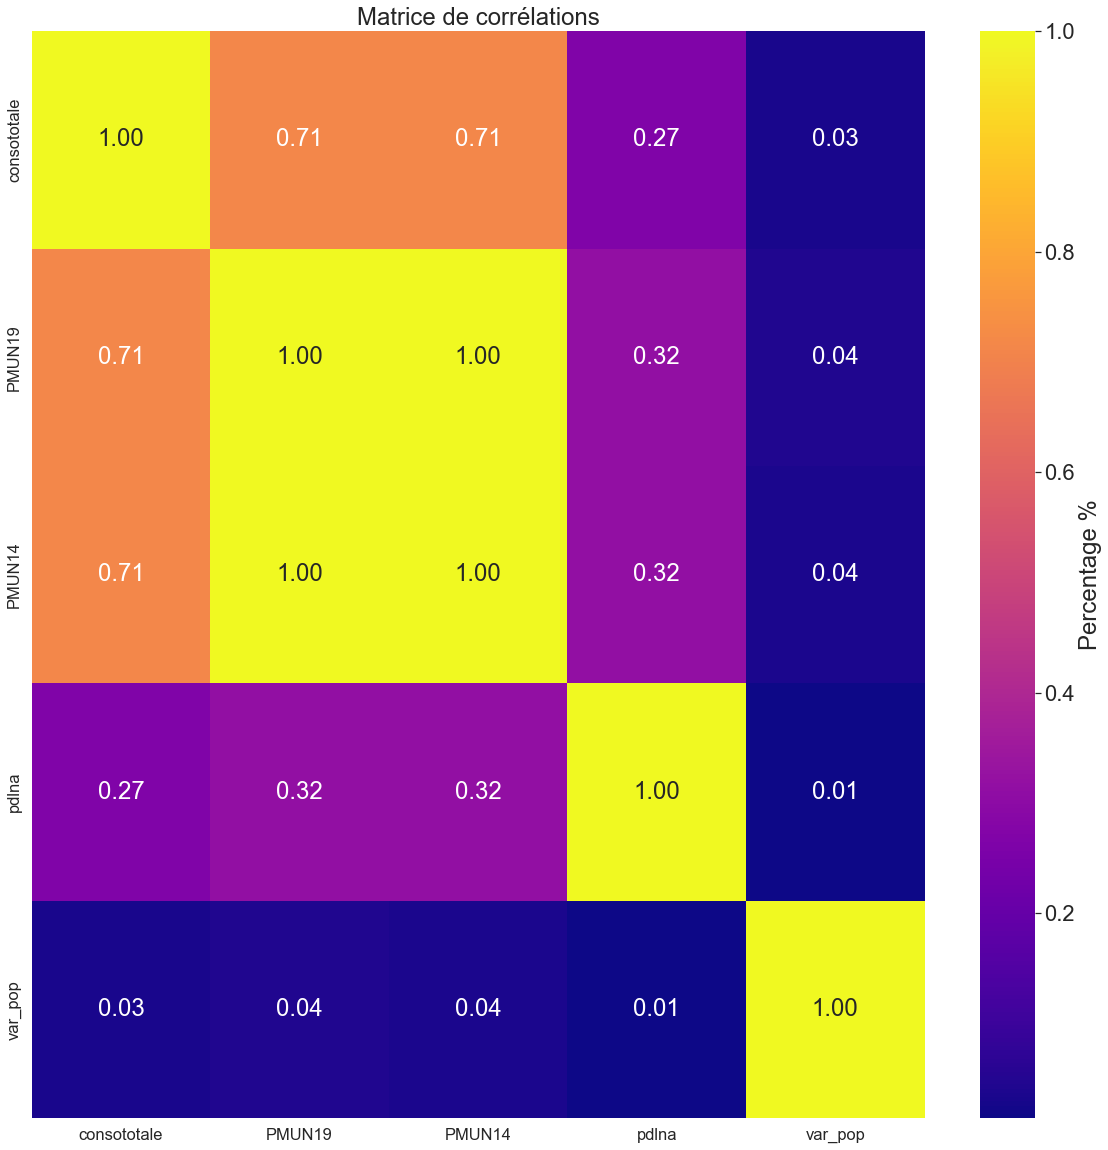

In [50]:
# Création d'un dataframe comportant les variables d'intérêt à partir de data_full
#data_light=data[['consototale', 'pdla','indqualr','indqualt','pdlna']]

data_light=data_full[['consototale','PMUN19','PMUN14','pdlna','var_pop']]

# Visualisation des corrélations
f, ax = plt.subplots(figsize=[20,20])
sns.set(font_scale=2)
sns.heatmap(data_light.corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'},cmap="plasma",ax=ax)
ax.set_title("Matrice de corrélations")
plt.show()

# <span style="color:#011C5D">4.  Utilisation des données de tourisme </span>

In [51]:
data_tour=pd.read_csv( 'base-cc-tourisme-2022-geo2022.csv', sep=';')
data_tour.head()

CODGEO  HT22  HT022  HT122  HT222  HT322  HT422  HT522  HTCH22  HTCH022  \
0  01001     0      0      0      0      0      0      0       0        0   
1  01002     0      0      0      0      0      0      0       0        0   
2  01004     1      0      0      0      1      0      0      34        0   
3  01005     2      1      0      0      1      0      0      20        7   
4  01006     0      0      0      0      0      0      0       0        0   

   HTCH122  HTCH222  HTCH322  HTCH422  HTCH522  CPG22  CPG022  CPG122  CPG222  \
0        0        0        0        0        0      0       0       0       0   
1        0        0        0        0        0      0       0       0       0   
2        0        0       34        0        0      0       0       0       0   
3        0        0       13        0        0      1       0       0       1   
4        0        0        0        0        0      0       0       0       0   

   CPG322  CPG422  CPG522  CPGE22  CPGE022  CPGE122  CPGE222  CPGE322  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        0        0        0   
2       0       0       0       0        0        0        0        0   
3       0       0       0      72        0        0       72        0   
4       0       0       0       0        0        0        0        0   

   CPGE422  CPGE522  CPGEL22  CPGEL022  CPGEL122  CPGEL222  CPGEL322  \
0        0        0        0         0         0         0         0   
1        0        0        0         0         0         0         0   
2        0        0        0         0         0         0         0   
3        0        0        4         0         0         4         0   
4        0        0        0         0         0         0         0   

   CPGEL422  CPGEL522  CPGEO22  CPGEO022  CPGEO122  CPGEO222  CPGEO322  \
0         0         0        0         0         0         0         0   
1         0         0        0         0         0         0         0   
2         0         0        0         0         0         0         0   
3         0         0       68         0         0        68         0   
4         0         0        0         0         0         0         0   

   CPGEO422  CPGEO522  VV22  VVUH22  VVLIT22  RT22  RTUH22  RTLIT22  AJCS22  \
0         0         0     0       0        0     0       0        0       0   
1         0         0     0       0        0     0       0        0       0   
2         0         0     0       0        0     1      16       16       0   
3         0         0     0       0        0     0       0        0       0   
4         0         0     0       0        0     0       0        0       0   

   AJCSUH22  AJCSLIT22  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0

In [52]:
data_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34983 entries, 0 to 34982
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CODGEO     34983 non-null  object
 1   HT22       34983 non-null  int64 
 2   HT022      34983 non-null  int64 
 3   HT122      34983 non-null  int64 
 4   HT222      34983 non-null  int64 
 5   HT322      34983 non-null  int64 
 6   HT422      34983 non-null  int64 
 7   HT522      34983 non-null  int64 
 8   HTCH22     34983 non-null  int64 
 9   HTCH022    34983 non-null  int64 
 10  HTCH122    34983 non-null  int64 
 11  HTCH222    34983 non-null  int64 
 12  HTCH322    34983 non-null  int64 
 13  HTCH422    34983 non-null  int64 
 14  HTCH522    34983 non-null  int64 
 15  CPG22      34983 non-null  int64 
 16  CPG022     34983 non-null  int64 
 17  CPG122     34983 non-null  int64 
 18  CPG222     34983 non-null  int64 
 19  CPG322     34983 non-null  int64 
 20  CPG422     34983 non-null  i

In [53]:
# Création d'une variable qui est la somme de toutes les types d'hébergement
data_tour['sum_tour'] = data_tour.sum(axis=1, numeric_only= True)
data_tour.describe()

HT22     HT022     HT122     HT222     HT322     HT422     HT522  \
count 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000   
mean      0.539     0.128     0.011     0.113     0.196     0.076     0.015   
std       9.134     1.080     0.176     1.088     3.939     2.597     0.584   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max    1585.000   165.000    23.000   160.000   688.000   456.000    93.000   

         HTCH22   HTCH022   HTCH122   HTCH222   HTCH322   HTCH422   HTCH522  \
count 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000   
mean     21.484     2.861     0.374     3.678     8.317     5.255     0.997   
std     488.686    41.706     6.190    44.399   184.830   178.228    50.523   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max   84023.000  6914.000   588.000  6605.000 31559.000 30179.000  8178.000   

          CPG22    CPG022    CPG122    CPG222    CPG322    CPG422    CPG522  \
count 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000   
mean      0.233     0.062     0.010     0.048     0.071     0.035     0.007   
std       0.967     0.271     0.103     0.283     0.372     0.339     0.122   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max      51.000     6.000     3.000    10.000    18.000    21.000    10.000   

         CPGE22   CPGE022   CPGE122   CPGE222   CPGE322   CPGE422   CPGE522  \
count 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000   
mean     25.697     2.558     0.630     4.116     8.106     7.679     2.609   
std     196.452    14.430     9.942    32.484    56.454    99.967    51.343   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max   14343.000   412.000   638.000  1319.000  3296.000  6387.000  4196.000   

        CPGEL22  CPGEL022  CPGEL122  CPGEL222  CPGEL322  CPGEL422  CPGEL522  \
count 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000   
mean      5.606     0.521     0.207     1.098     1.657     1.760     0.362   
std      59.433     6.564     5.694    14.292    18.190    33.860    10.317   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max    3272.000   313.000   583.000   841.000  1007.000  2517.000   677.000   

        CPGEO22  CPGEO022  CPGEO122  CPGEO222  CPGEO322  CPGEO422  CPGEO522  \
count 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000 34983.000   
mean     20.090     2.036     0.422     3.018     6.449     5.918     2.247   
std     149.062    11.595     7.224    24.657    44.371    72.956    45.003   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000 

In [54]:
# Les codes géo commençant par 0 doivent être remplacés par les codes insee de data (sans le 0 devant)
code_geo_old=data_tour['CODGEO'][0:3143].astype(str)

def short_code(x):
    return x[1:]

code_geo_ok=code_geo_old.apply(lambda x: short_code(x)).to_list()
data_tour['CODGEO'][0:3143]=code_geo_ok


In [55]:
data_tour.rename(columns={"CODGEO": "code_commune"}, inplace=True)
data_tour.head()

code_commune  HT22  HT022  HT122  HT222  HT322  HT422  HT522  HTCH22  \
0         1001     0      0      0      0      0      0      0       0   
1         1002     0      0      0      0      0      0      0       0   
2         1004     1      0      0      0      1      0      0      34   
3         1005     2      1      0      0      1      0      0      20   
4         1006     0      0      0      0      0      0      0       0   

   HTCH022  HTCH122  HTCH222  HTCH322  HTCH422  HTCH522  CPG22  CPG022  \
0        0        0        0        0        0        0      0       0   
1        0        0        0        0        0        0      0       0   
2        0        0        0       34        0        0      0       0   
3        7        0        0       13        0        0      1       0   
4        0        0        0        0        0        0      0       0   

   CPG122  CPG222  CPG322  CPG422  CPG522  CPGE22  CPGE022  CPGE122  CPGE222  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       1       0       0       0      72        0        0       72   
4       0       0       0       0       0       0        0        0        0   

   CPGE322  CPGE422  CPGE522  CPGEL22  CPGEL022  CPGEL122  CPGEL222  CPGEL322  \
0        0        0        0        0         0         0         0         0   
1        0        0        0        0         0         0         0         0   
2        0        0        0        0         0         0         0         0   
3        0        0        0        4         0         0         4         0   
4        0        0        0        0         0         0         0         0   

   CPGEL422  CPGEL522  CPGEO22  CPGEO022  CPGEO122  CPGEO222  CPGEO322  \
0         0         0        0         0         0         0         0   
1         0         0        0         0         0         0         0   
2         0         0        0         0         0         0         0   
3         0         0       68         0         0        68         0   
4         0         0        0         0         0         0         0   

   CPGEO422  CPGEO522  VV22  VVUH22  VVLIT22  RT22  RTUH22  RTLIT22  AJCS22  \
0         0         0     0       0        0     0       0        0       0   
1         0         0     0       0        0     0       0        0       0   
2         0         0     0       0        0     1      16       16       0   
3         0         0     0       0        0     0       0        0       0   
4         0         0     0       0        0     0       0        0       0   

   AJCSUH22  AJCSLIT22  sum_tour  
0         0          0         0  
1         0          0         0  
2         0          0       103  
3         0          0       334  
4         0          0         0

In [56]:
# Creation d'un code commune numérique: remplacement 2A par 200 et 3B par 300 (corse)
data_tour['code_commune_num']=data_tour['code_commune'].astype(str)
data_tour['code_commune_num'] =data_tour['code_commune_num'] .str.replace('2A','200')
data_tour['code_commune_num'] =data_tour['code_commune_num'] .str.replace('2B','300')
data_tour['code_commune_num']=data_tour['code_commune_num'].astype(int)
#data_tour.info()


In [ ]:
#data_tour['code_commune_num'].sort_values()

In [ ]:
#data_full.columns

In [110]:
data_full_2 = pd.merge(data_full, data_tour, how="left", on=["code_commune_num"])

data_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35289 entries, 0 to 35288
Columns: 110 entries, pdla to sum_tour
dtypes: float64(96), int32(1), int64(7), object(6)
memory usage: 29.8+ MB


In [ ]:
data_full_2.head()

In [80]:
#data_full_2.columns.to_list()

In [111]:
### Les listes 2 et 3 ne sont pas pertinentes 

list_tour_1 = ['consototale','HT22',
 'HT022','HT122','HT222','HT322','HT422','HT522',
 'HTCH22','HTCH022','HTCH122','HTCH222','HTCH322','HTCH422','HTCH522']


list_tour_2=['consototale',
 'CPGEL522','CPGEO22','CPGEO022','CPGEO122','CPGEO222','CPGEO322','CPGEO422','CPGEO522','VV22','VVUH22','VVLIT22','RT22','RTUH22','RTLIT22','AJCS22',
 'AJCSUH22','AJCSLIT22']

list_tour_3=['consototale',
 'CPG22','CPG022','CPG122', 'CPG222','CPG322','CPG422','CPG522','CPGE22','CPGE022','CPGE122','CPGE222',
 'CPGE322','CPGE422','CPGE522','CPGEL22','CPGEL022','CPGEL122','CPGEL222','CPGEL322','CPGEL422']

In [112]:
list_tour_globale=list_tour_2[1:] + list_tour_3[1:] 

#list_tour_globale

In [ ]:
#data_full_2['code_commune_num'].sort_values()

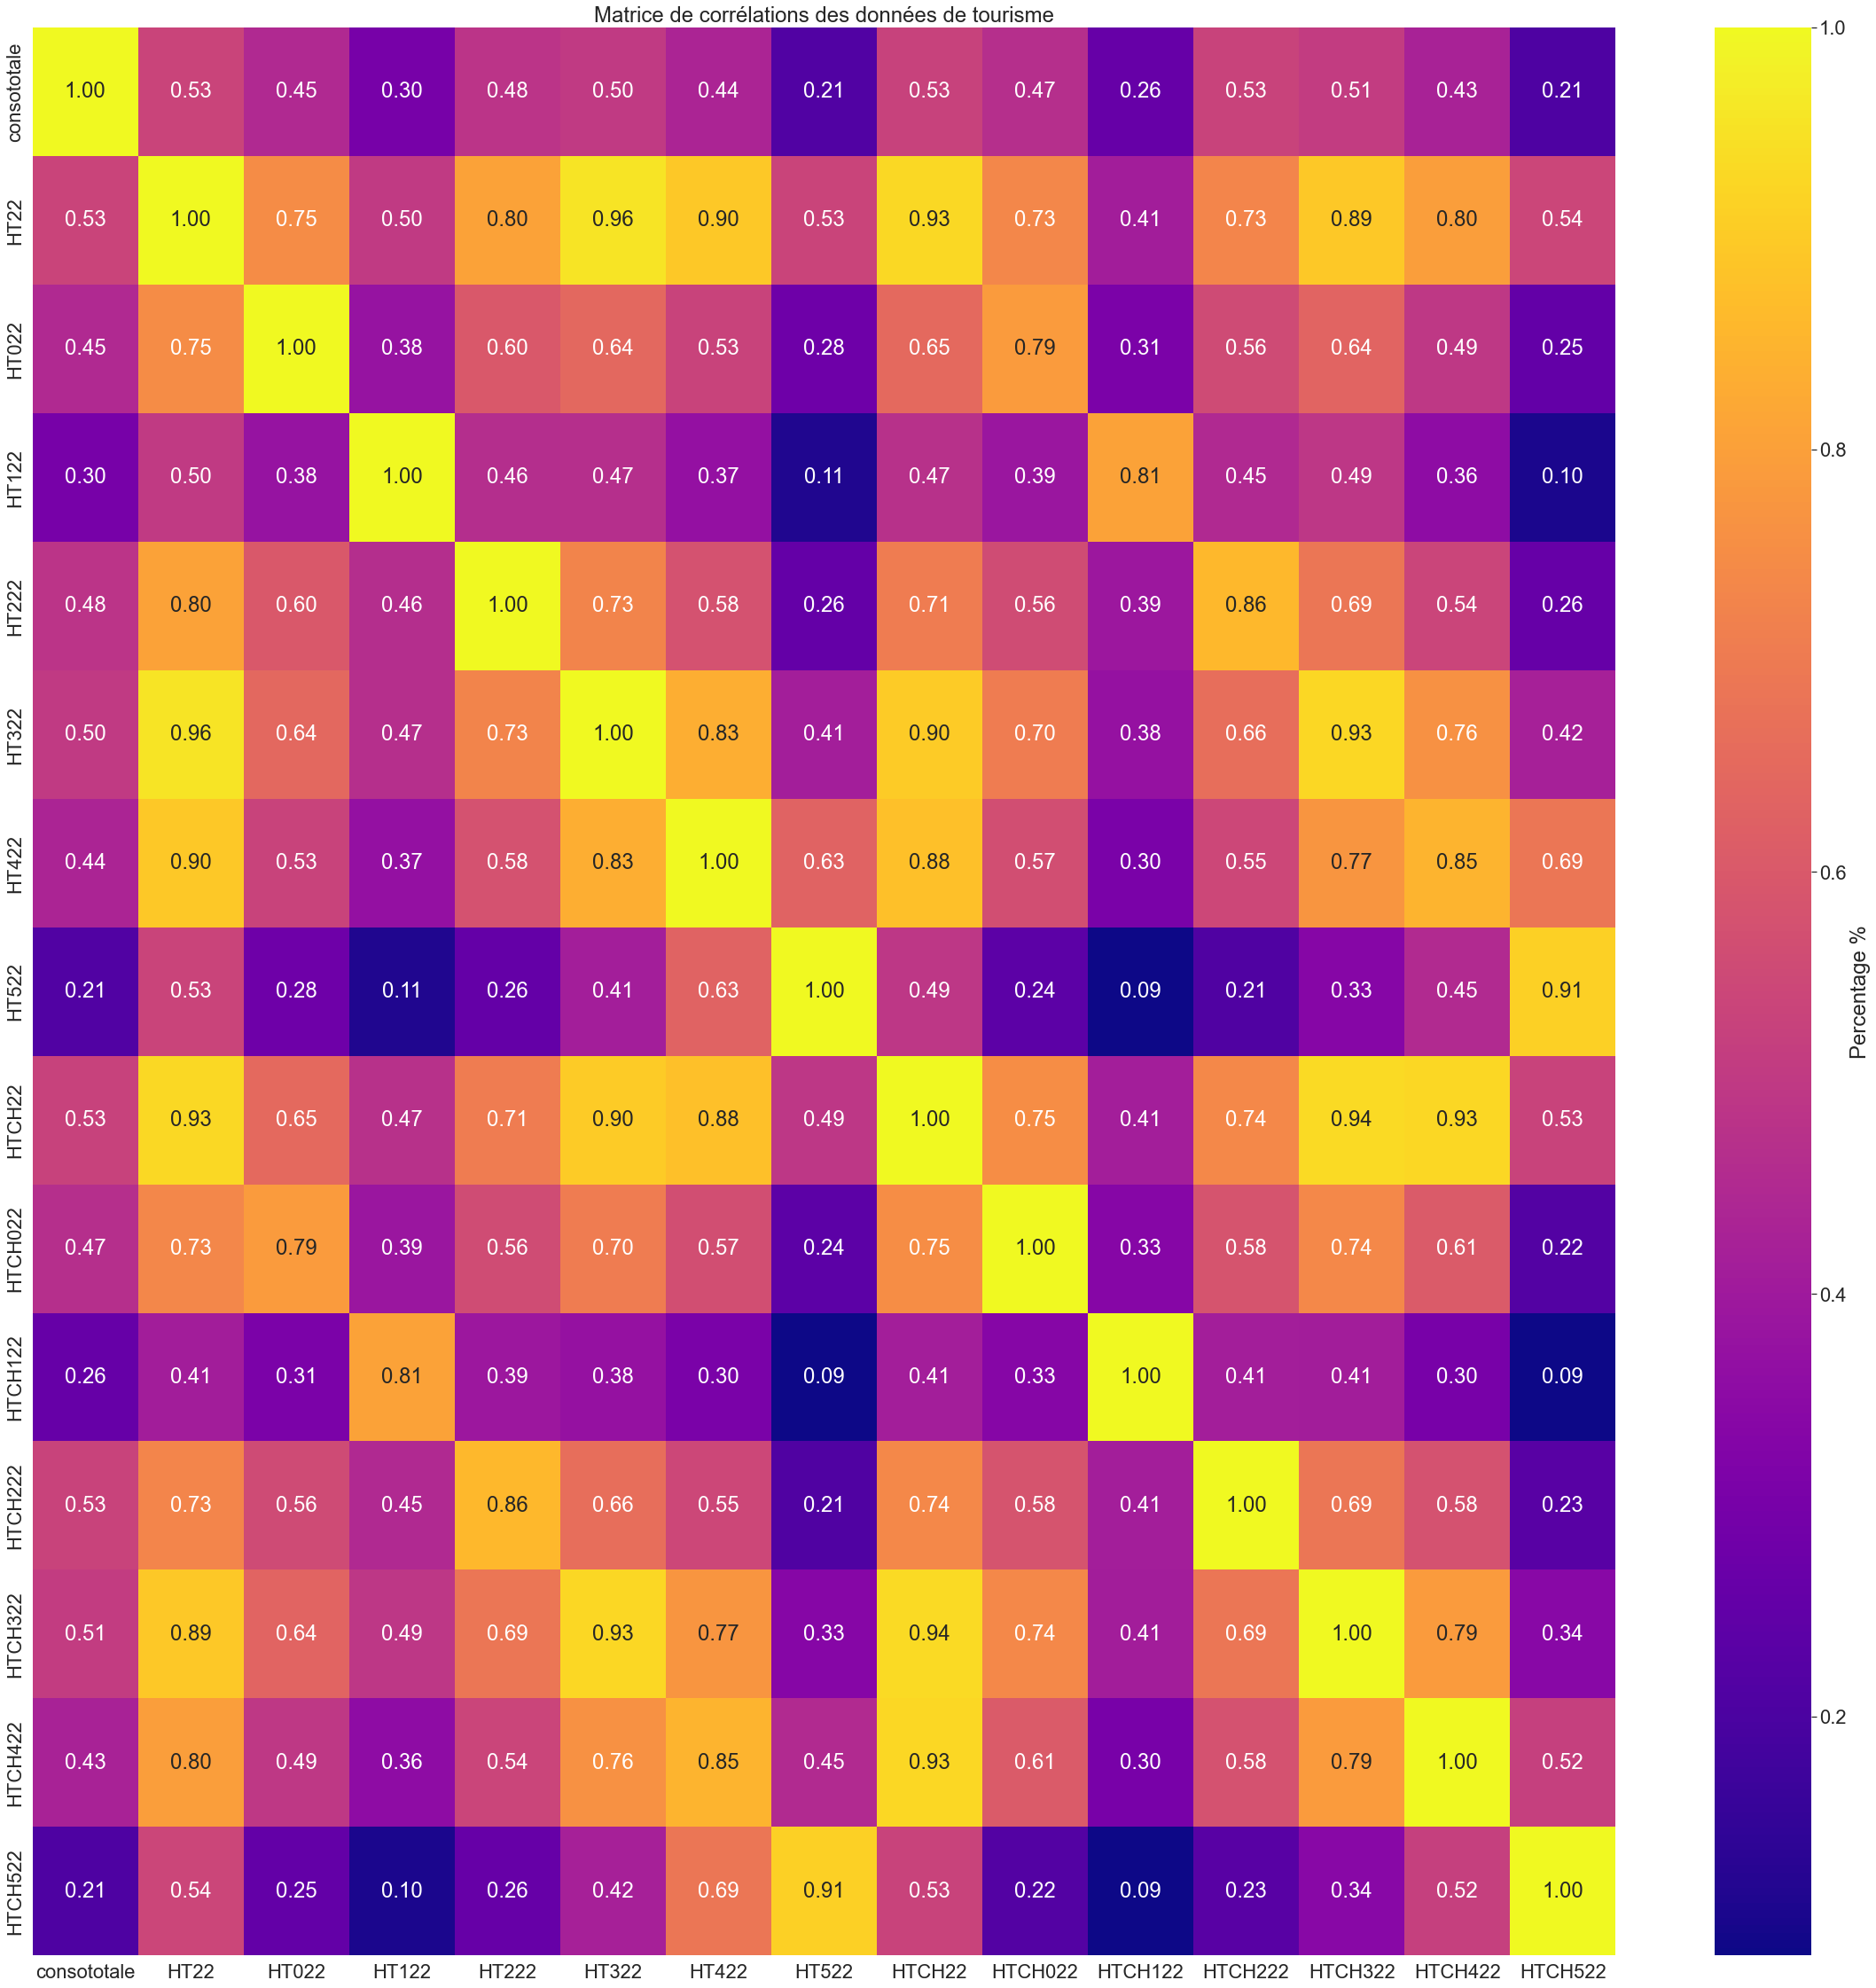

In [79]:
# Création d'un dataframe comportant les variables de tourisme d'une des 3 listes
# etude corrélations avec la target

data_light=data_full_2[list_tour_1]

# Visualisation des corrélations
f, ax = plt.subplots(figsize=[40,40])
sns.set(font_scale=2)
sns.heatmap(data_light.corr(),
            annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'},cmap="plasma",ax=ax)
ax.set_title("Matrice de corrélations des données de tourisme")
plt.show()

In [96]:
#data_full_2.columns.to_list()

In [113]:

#data_full_2.drop(columns=[list_tour_globale], inplace=True, axis=1)

sauve=data_full_2.copy()

In [118]:
sauve.columns.to_list()

['pdla',
 'nombre_maille_secretisees_a',
 'indquala',
 'nombre_maille_secretisees_i',
 'indquali',
 'nombre_maille_secretisees_t',
 'indqualt',
 'nombre_maille_secretisees_r',
 'indqualr',
 'partr',
 'pdlna',
 'indqualna',
 'code_departement',
 'libelle_departement',
 'consototale',
 'code_commune_num',
 'nb_maille',
 'latitude',
 'longitude',
 'code_commune_x',
 'REG',
 'DEP',
 'LIBGEO',
 'PMUN19',
 'PMUN18',
 'PMUN17',
 'PMUN16',
 'PMUN15',
 'PMUN14',
 'PMUN13',
 'PMUN12',
 'PMUN11',
 'PMUN10',
 'PMUN09',
 'PMUN08',
 'PMUN07',
 'PMUN06',
 'PSDC99',
 'PSDC90',
 'PSDC82',
 'PSDC75',
 'PSDC68',
 'PSDC62',
 'PTOT54',
 'PTOT36',
 'PTOT1931',
 'PTOT1926',
 'PTOT1921',
 'PTOT1911',
 'PTOT1906',
 'PTOT1901',
 'PTOT1896',
 'PTOT1891',
 'PTOT1886',
 'PTOT1881',
 'PTOT1876',
 'var_pop',
 'code_commune_y',
 'HT22',
 'HT022',
 'HT122',
 'HT222',
 'HT322',
 'HT422',
 'HT522',
 'HTCH22',
 'HTCH022',
 'HTCH122',
 'HTCH222',
 'HTCH322',
 'HTCH422',
 'HTCH522',
 'CPG22',
 'CPG022',
 'CPG122',
 'CPG222

In [120]:
data_full_2 = data_full_2[['code_commune_num', 'consototale','nb_maille','PMUN14','latitude','longitude','HT22',
 'HT022','HT122','HT222','HT322','HT422','HT522',
 'HTCH22','HTCH022','HTCH122','HTCH222','HTCH322','HTCH422','HTCH522']]

data_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35289 entries, 0 to 35288
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code_commune_num  35289 non-null  int32  
 1   consototale       35289 non-null  float64
 2   nb_maille         35289 non-null  int64  
 3   PMUN14            35247 non-null  float64
 4   latitude          35285 non-null  float64
 5   longitude         35285 non-null  float64
 6   HT22              35262 non-null  float64
 7   HT022             35262 non-null  float64
 8   HT122             35262 non-null  float64
 9   HT222             35262 non-null  float64
 10  HT322             35262 non-null  float64
 11  HT422             35262 non-null  float64
 12  HT522             35262 non-null  float64
 13  HTCH22            35262 non-null  float64
 14  HTCH022           35262 non-null  float64
 15  HTCH122           35262 non-null  float64
 16  HTCH222           35262 non-null  float6

# <span style="color:#011C5D">5. Etude de la target </span>

## <span style="color:#011C5D">5.1 Par département </span>

In [121]:
# Sélection de qqs données pertinentes
data_full_2.describe()

code_commune_num  consototale  nb_maille     PMUN14  latitude  \
count         35289.000    35289.000  35289.000  35247.000 35285.000   
mean          48914.102    11034.683      0.579   1926.347    46.790   
std           34058.576    51620.958      1.412   8759.223     3.561   
min            1001.000        1.803      0.000      3.000   -21.340   
25%           25379.000      902.545      0.000    202.000    45.075   
50%           50205.000     2180.248      0.000    461.000    47.348   
75%           68017.000     6334.737      1.000   1169.000    48.822   
max          300366.000  4450020.148     49.000 466297.000    51.073   

       longitude      HT22     HT022     HT122     HT222     HT322     HT422  \
count  35285.000 35262.000 35262.000 35262.000 35262.000 35262.000 35262.000   
mean       2.718     0.509     0.125     0.011     0.112     0.184     0.065   
std        4.375     3.417     0.606     0.133     0.672     1.443     0.908   
min      -61.780     0.000     0.000     0.000     0.000     0.000     0.000   
25%        0.799     0.000     0.000     0.000     0.000     0.000     0.000   
50%        2.717     0.000     0.000     0.000     0.000     0.000     0.000   
75%        4.914     0.000     0.000     0.000     0.000     0.000     0.000   
max       55.755   178.000    28.000     7.000    22.000    84.000    62.000   

          HT522    HTCH22   HTCH022   HTCH122   HTCH222   HTCH322   HTCH422  \
count 35262.000 35262.000 35262.000 35262.000 35262.000 35262.000 35262.000   
mean      0.012    19.781     2.748     0.383     3.602     7.717     4.562   
std       0.304   192.621    19.899     5.638    25.892    75.931    77.092   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max      39.000  9874.000  1159.000   289.000   995.000  5292.000  4820.000   

        HTCH522  
count 35262.000  
mean      0.769  
std      25.658  
min       0.000  
25%       0.000  
50%       0.000  
75%       0.000  
max    3605.000

In [122]:
# La valeur maximale de la consototale semble aberrante
data['consototale'].max()

4450020.148

In [ ]:
data[data['consototale']<50000]['consototale'].shape

In [123]:
# Fonction qui récupère les 2 premiers chiffres de la commune pour la métropole
# et les 3 premiers pour la Corse
def find_dpt(x):
    x=str(x)
    if len(x)<6:
        return x[0:2]
    else:
        return x[0:3]


data_full_2['dpt_num']=data_full_2['code_commune_num'].astype(str).apply(lambda x: find_dpt(x) ).astype(int)

In [124]:
# Affichage des valeurs moyennes par département
data_group_dpt = data_full_2.groupby('dpt_num').median()
data_group_dpt.reset_index(inplace=True)
data_group_dpt=data_group_dpt.sort_values(['consototale'])

In [125]:
data_group_dpt.head()

dpt_num  code_commune_num  consototale  nb_maille  PMUN14  latitude  \
42       52         52274.500      628.281      0.000 134.000    48.104   
45       55         55299.000      640.042      0.000 157.000    49.024   
55       65         65241.500      670.372      0.000 161.500    43.131   
88      300        300189.000      755.042      0.000 142.000    42.422   
60       70         70238.500      864.867      0.000 228.500    47.588   

    longitude  HT22  HT022  HT122  HT222  HT322  HT422  HT522  HTCH22  \
42      5.256 0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
45      5.384 0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
55      0.203 0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
88      9.345 0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   
60      6.005 0.000  0.000  0.000  0.000  0.000  0.000  0.000   0.000   

    HTCH022  HTCH122  HTCH222  HTCH322  HTCH422  HTCH522  
42    0.000    0.000    0.000    0.000    0.000    0.000  
45    0.000    0.000    0.000    0.000    0.000    0.000  
55    0.000    0.000    0.000    0.000    0.000    0.000  
88    0.000    0.000    0.000    0.000    0.000    0.000  
60    0.000    0.000    0.000    0.000    0.000    0.000

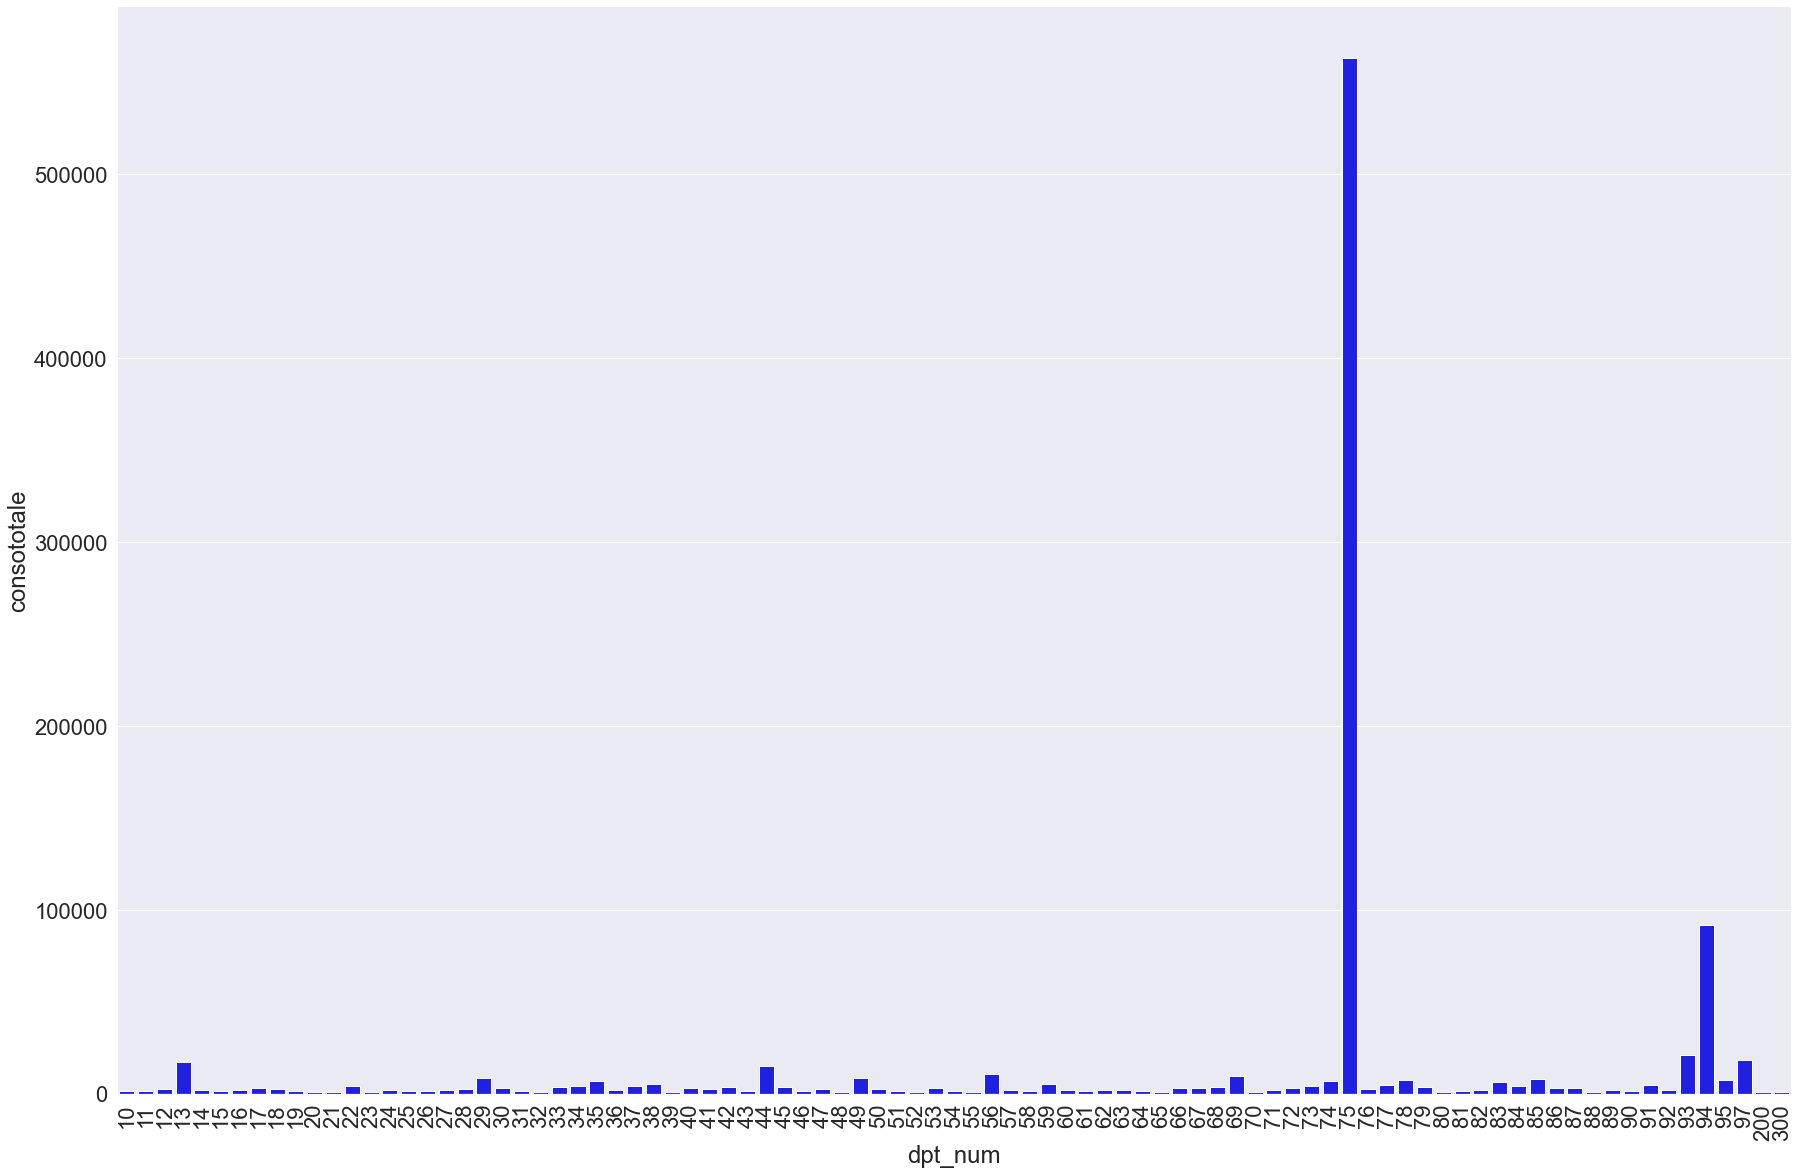

In [126]:
f, ax = plt.subplots(figsize=[30,20])
x=data_group_dpt['dpt_num']
y=data_group_dpt['consototale']

sns.barplot(data=data_group_dpt, x='dpt_num', y="consototale", color='blue')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# On retrouve le caractère atypique de la région parisienne

## <span style="color:#011C5D">5.2 Bilan global des corrélations </span>

In [ ]:
data_full_2.describe()

In [127]:

temp=data_full_2.drop(['code_commune_num'], axis=1)

In [128]:
# On affiche la matrice des corrélations de Pearson

sns.set(font_scale=1.5)
corr_matrix = temp.corr( method='pearson').abs()


In [129]:
print(f"Les coeff de corrélation de la target sont :\n\n{corr_matrix['consototale'].sort_values(ascending=False)}.")

Les coeff de corrélation de la target sont :

consototale   1.000
PMUN14        0.713
nb_maille     0.630
HT22          0.533
HTCH222       0.531
HTCH22        0.526
HTCH322       0.510
HT322         0.501
HT222         0.484
HTCH022       0.465
HT022         0.449
HT422         0.435
HTCH422       0.426
HT122         0.298
HTCH122       0.261
HT522         0.214
HTCH522       0.208
latitude      0.033
dpt_num       0.030
longitude     0.012
Name: consototale, dtype: float64.


In [130]:
corr_visu= corr_matrix['consototale'].sort_values(ascending=False)

In [ ]:
#corr_visu.head()

Text(0.5, 1.0, 'Visualisation des coefficients de corrélation de la target et des variables')

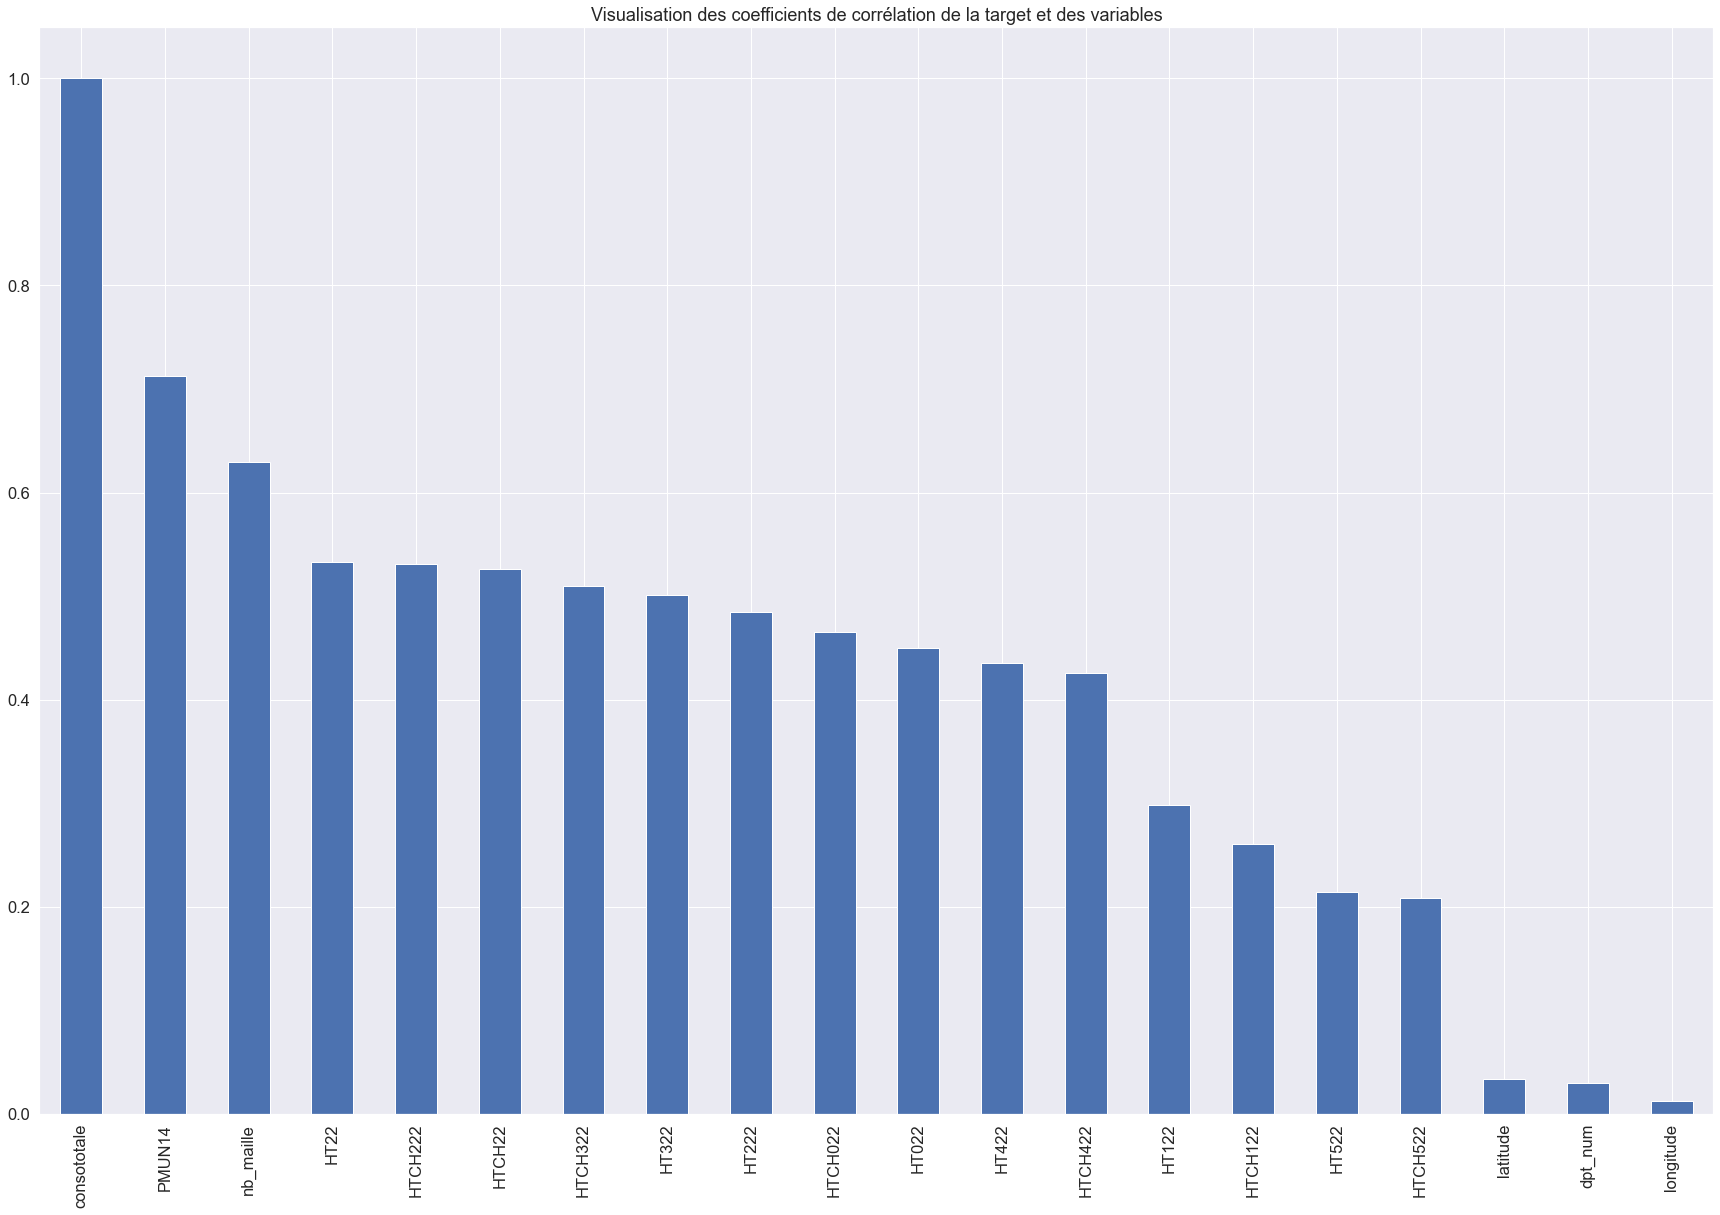

In [131]:
f, ax = plt.subplots(figsize=[30,20])
corr_visu.plot(kind='bar')
ax.set_title('Visualisation des coefficients de corrélation de la target et des variables')

## <span style="color:#011C5D">5.3 Tracé de la target en fonction des variables pertinentes </span>

In [132]:
def plot_var(var):
    f, ax = plt.subplots(figsize=[20,10])
    #var='PMUN14'
    plt.scatter(data_full_2[var], data_full_2['consototale'])
    ax.set_title(f"Tracé de la target en fonction de la variable {var}.")
    plt.xlabel(var)
    plt.ylabel('Consommation totale')

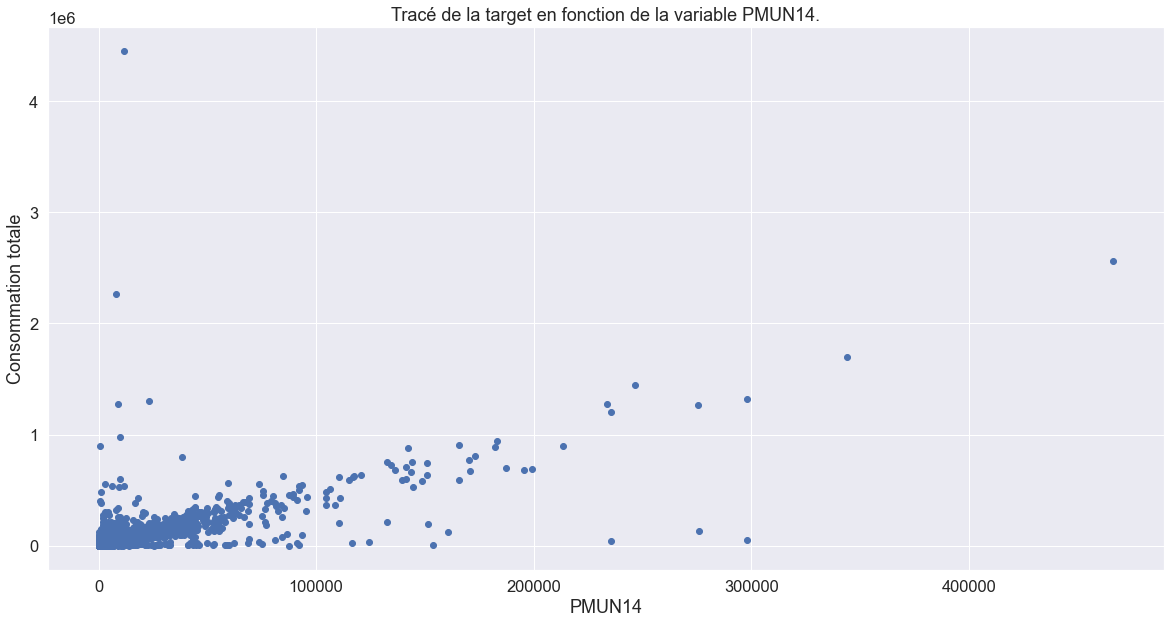

In [133]:
plot_var('PMUN14')

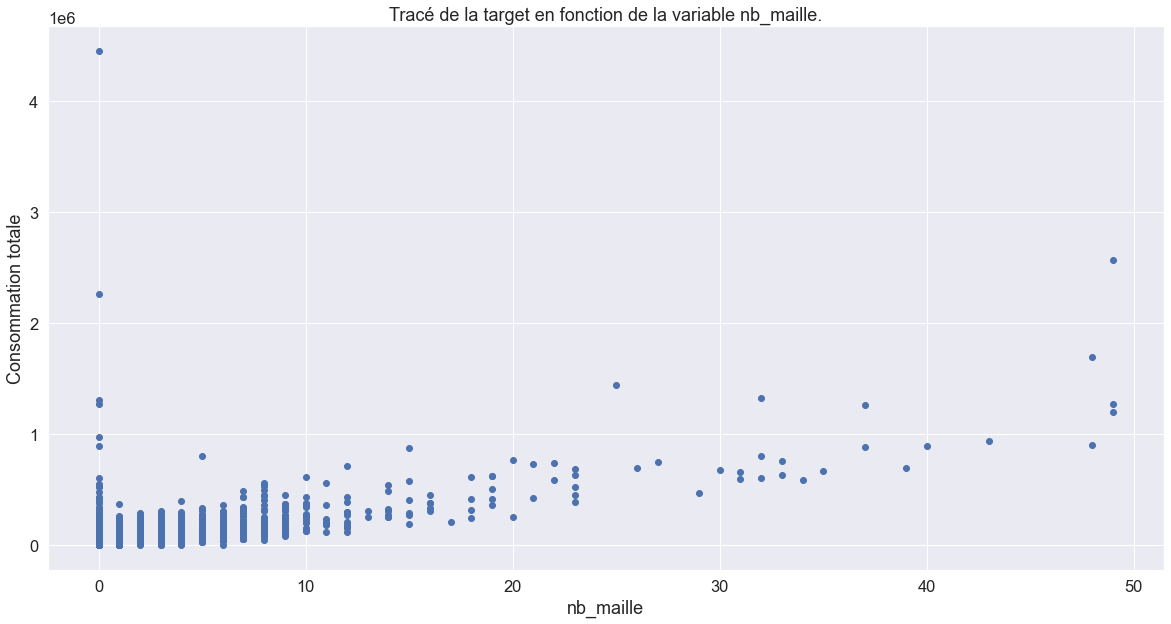

In [134]:
plot_var('nb_maille')

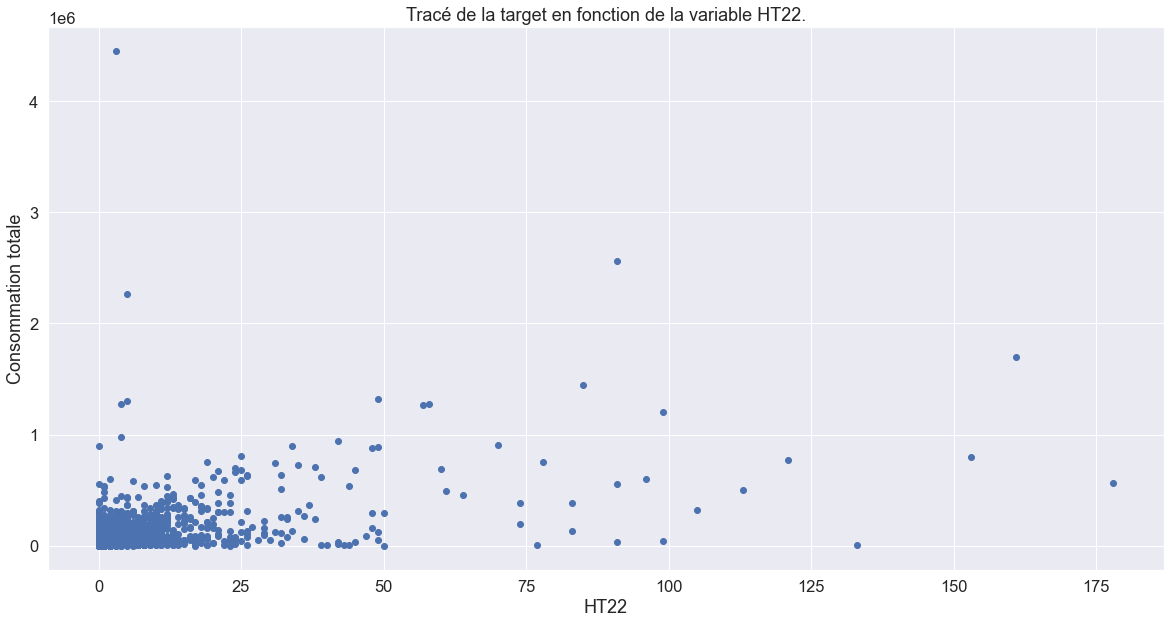

In [135]:
plot_var('HT22')

In [ ]:
# possibilité d'attribuer la valeur moyenne issue de group by
# à une nouvelle variable
#df['Data4'] = df['Data3'].groupby(df['Date']).transform('sum')

## <span style="color:#011C5D">5.4 Consommation par habitant </span>

In [136]:
data_full_2['conso_par_hab']=data_full_2['consototale']/data_full_2['PMUN14']

In [148]:
data_full_2.describe()

code_commune_num  consototale  nb_maille     PMUN14  latitude  \
count         35289.000    35289.000  35289.000  35247.000 35285.000   
mean          48914.102     8542.086      0.579   1926.347    46.790   
std           34058.576    39912.951      1.412   8759.223     3.561   
min            1001.000        1.803      0.000      3.000   -21.340   
25%           25379.000      916.982      0.000    202.000    45.075   
50%           50205.000     1946.713      0.000    461.000    47.348   
75%           68017.000     4636.123      1.000   1169.000    48.822   
max          300366.000  2565162.648     49.000 466297.000    51.073   

       longitude      HT22     HT022     HT122     HT222     HT322     HT422  \
count  35285.000 35262.000 35262.000 35262.000 35262.000 35262.000 35262.000   
mean       2.718     0.509     0.125     0.011     0.112     0.184     0.065   
std        4.375     3.417     0.606     0.133     0.672     1.443     0.908   
min      -61.780     0.000     0.000     0.000     0.000     0.000     0.000   
25%        0.799     0.000     0.000     0.000     0.000     0.000     0.000   
50%        2.717     0.000     0.000     0.000     0.000     0.000     0.000   
75%        4.914     0.000     0.000     0.000     0.000     0.000     0.000   
max       55.755   178.000    28.000     7.000    22.000    84.000    62.000   

          HT522    HTCH22   HTCH022   HTCH122   HTCH222   HTCH322   HTCH422  \
count 35262.000 35262.000 35262.000 35262.000 35262.000 35262.000 35262.000   
mean      0.012    19.781     2.748     0.383     3.602     7.717     4.562   
std       0.304   192.621    19.899     5.638    25.892    75.931    77.092   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max      39.000  9874.000  1159.000   289.000   995.000  5292.000  4820.000   

        HTCH522   dpt_num  conso_par_hab  
count 35262.000 35289.000      35247.000  
mean      0.769    52.566          6.063  
std      25.658    32.223         12.437  
min       0.000    10.000          0.000  
25%       0.000    30.000          3.784  
50%       0.000    52.000          4.566  
75%       0.000    70.000          5.811  
max    3605.000   300.000       1106.213

# <span style="color:#011C5D">6 Application des algorithmes de ML </span>

## <span style="color:#011C5D">6.1 Régression linéaire </span>

Il s'agit d'évaluer l'importance des différents coefficients de régression.

### <span style="color:#011C5D">6.1.1 Statsmodel </span>

In [ ]:
data_full_2.columns

In [149]:
# Les valeurs de consommation par habitant supérieure à 3 fois la valeur mediane de conso par
# habitant sont remplacées par la mediane
val_med_par_hab=3*data_full_2['conso_par_hab'].median()
val_med=data_full_2[data_full_2['conso_par_hab']<val_med_par_hab]['consototale'].median()
data_full_2 = data_full_2[data_full_2['conso_par_hab']<val_med_par_hab]

In [150]:
data_full_2.describe()

code_commune_num  consototale  nb_maille     PMUN14  latitude  \
count         33950.000    33950.000  33950.000  33950.000 33946.000   
mean          48888.634     8646.205      0.582   1942.951    46.808   
std           34153.827    40110.220      1.412   8912.288     3.349   
min            1001.000        1.803      0.000      3.000   -21.340   
25%           25381.250      882.925      0.000    200.000    45.056   
50%           50113.500     1946.713      0.000    453.000    47.339   
75%           67508.750     4838.079      1.000   1149.000    48.822   
max          300366.000  2565162.648     49.000 466297.000    51.073   

       longitude      HT22     HT022     HT122     HT222     HT322     HT422  \
count  33946.000 33941.000 33941.000 33941.000 33941.000 33941.000 33941.000   
mean       2.685     0.470     0.117     0.010     0.105     0.173     0.057   
std        4.323     3.255     0.582     0.129     0.657     1.426     0.823   
min      -61.780     0.000     0.000     0.000     0.000     0.000     0.000   
25%        0.796     0.000     0.000     0.000     0.000     0.000     0.000   
50%        2.701     0.000     0.000     0.000     0.000     0.000     0.000   
75%        4.891     0.000     0.000     0.000     0.000     0.000     0.000   
max       55.755   178.000    28.000     7.000    22.000    84.000    57.000   

          HT522    HTCH22   HTCH022   HTCH122   HTCH222   HTCH322   HTCH422  \
count 33941.000 33941.000 33941.000 33941.000 33941.000 33941.000 33941.000   
mean      0.008    17.930     2.550     0.368     3.332     7.262     3.942   
std       0.143   181.436    19.491     5.603    24.590    75.475    71.146   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
max       8.000  9874.000  1159.000   289.000   886.000  5292.000  4820.000   

        HTCH522   dpt_num  conso_par_hab  
count 33941.000 33950.000      33950.000  
mean      0.476    52.540          4.957  
std      13.289    32.334          1.927  
min       0.000    10.000          0.000  
25%       0.000    30.000          3.752  
50%       0.000    52.000          4.503  
75%       0.000    70.000          5.604  
max    1143.000   300.000         13.692

In [151]:
data_full_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33950 entries, 0 to 35288
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code_commune_num  33950 non-null  int32  
 1   consototale       33950 non-null  float64
 2   nb_maille         33950 non-null  int64  
 3   PMUN14            33950 non-null  float64
 4   latitude          33946 non-null  float64
 5   longitude         33946 non-null  float64
 6   HT22              33941 non-null  float64
 7   HT022             33941 non-null  float64
 8   HT122             33941 non-null  float64
 9   HT222             33941 non-null  float64
 10  HT322             33941 non-null  float64
 11  HT422             33941 non-null  float64
 12  HT522             33941 non-null  float64
 13  HTCH22            33941 non-null  float64
 14  HTCH022           33941 non-null  float64
 15  HTCH122           33941 non-null  float64
 16  HTCH222           33941 non-null  float6

In [161]:

data_light=data_full_2[['nb_maille','PMUN14','HT22']]

data_light.columns

Index(['nb_maille', 'PMUN14', 'HT22'], dtype='object')

In [162]:
X_test_reg=data_light
liste_test_reg=X_test_reg.columns.to_list()

In [163]:
liste_test_reg

['nb_maille', 'PMUN14', 'HT22']

In [164]:
y = data_full_2['consototale']

In [165]:
# Valable si le nbre de var num est sup à 3, sinon il faut rentrer la formule à la main

my_formula='consototale ~ '
my_formula=my_formula+liste_test_reg[0]

for col in liste_test_reg[1:-1]:
    my_formula=my_formula+'+'+ col

my_formula=my_formula+'+'+liste_test_reg[-1]
print(f"La formule à utiliser pour statsmodel lm est: \n{my_formula}")

La formule à utiliser pour statsmodel lm est: 
consototale ~ nb_maille+PMUN14+HT22


In [166]:
# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X_test_reg, y, train_size=0.8, random_state=42)

In [167]:
print(f"La taille de X_train est de {X_train.shape[0]} lignes.\nLa taille de X_valid est de {X_valid.shape[0]} lignes.")

La taille de X_train est de 27160 lignes.
La taille de X_valid est de 6790 lignes.


In [168]:
# On remplace les valeurs manquantes par la médiane
imputer= SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_valid=imputer.transform(X_valid)

# On centre et normalise les données
sc=RobustScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform (X_valid)

# Il s'agit de créer un dataframe utilisable par statsmodel et pour la dataviz: data_train_reg
data_train_reg=pd.DataFrame(X_train, columns=X_test_reg.columns, index=y_train.index)
data_train_reg['consototale']=y_train
data_train_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27160 entries, 14259 to 16398
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nb_maille    27160 non-null  float64
 1   PMUN14       27160 non-null  float64
 2   HT22         27160 non-null  float64
 3   consototale  27160 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


<AxesSubplot:>

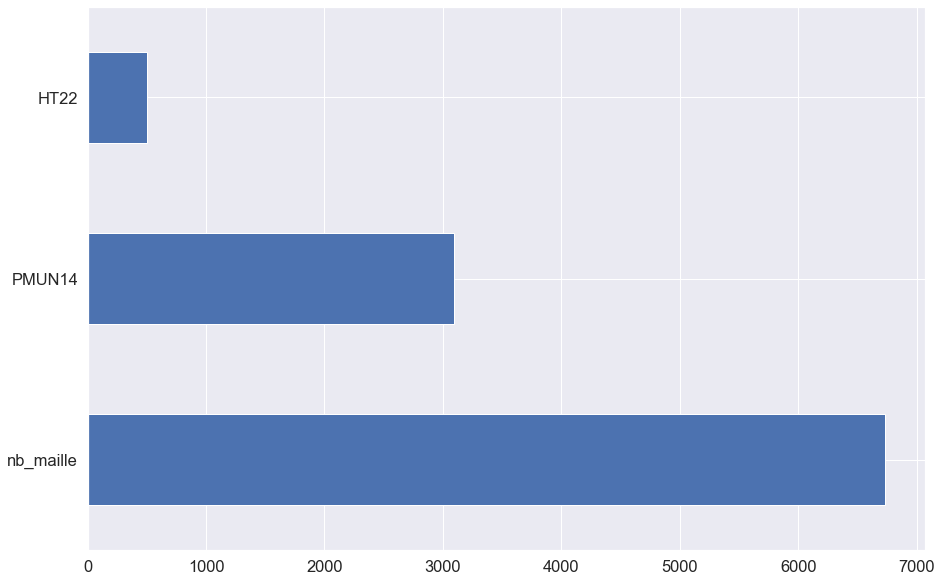

In [169]:
# Régression avec statsmodel

#data=pd.DataFrame(X_reg, columns=X.columns)

lm = smf.ols(formula=my_formula, data=data_train_reg).fit()

# comme les variables sont normalisées, les coeff sont à la même échelle, donc comparables
# afficchage des coefficients
lm.params[1:].plot.barh(figsize=(15,10))

# les coeff les plus importants permettent de sélectionner les variables les + influentes 

In [170]:
# Classement par ordre décroisssant de la valeur absolue des coeff.
abs(lm.params[1:]).sort_values(ascending=False)

nb_maille   6730.092
PMUN14      3092.535
HT22         505.584
dtype: float64

In [ ]:
# Création d'une liste des meilleurs candidats utilisable pour la suite: 

#liste_best=list(abs(lm.params[1:]).sort_values(ascending=False).index)
#liste_best[:5]

In [171]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consototale   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 5.705e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        18:09:13   Log-Likelihood:            -2.9971e+05
No. Observations:               27160   AIC:                         5.994e+05
Df Residuals:                   27156   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -301.5822    101.201     -2.980      0.003    -499.942    -103.222
nb_maille   6730.0916    103.258     65.177      0.000    6527.700    6932.483
PMUN14      3092.5351     18.208    169.846      0.000    3056.847    3128.224
HT22         505.5839     38.138     13.257      0.000     430.832     580.336
==============================================================================
Omnibus:                    35804.784   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        476593070.920
Skew:                          -6.026   Prob(JB):                         0.00
Kurtosis:                     651.843   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:#011C5D">6.1.2 Avec sklearn : prise en compte ou pas de non-linéarité avec des coeff polynomiaux</span>

Les coeff sont les suivants: [ 3.74441090e+03  3.23318871e+03  2.22655272e+03 -7.29581366e+02
  8.82532974e+01  1.12509664e+02 -1.46759764e+01 -5.49036594e-03
 -2.30682942e+01]
La RMSE vaut 10783.17.


Text(0, 0.5, 'Valeur de consommation prédite')

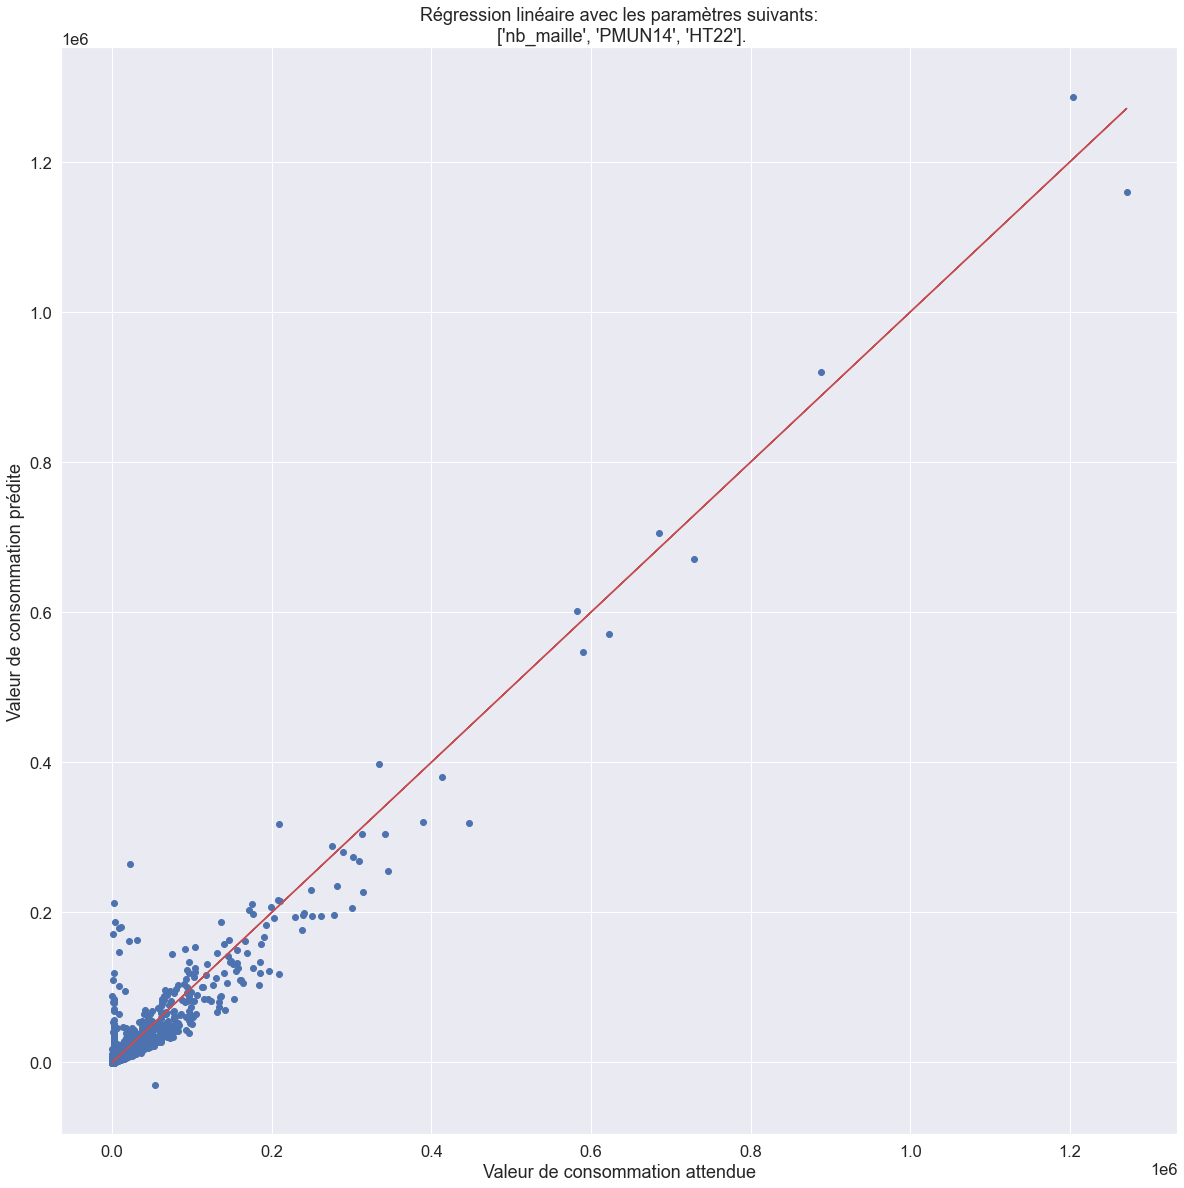

In [176]:
# Choix des variables



list_col= ['nb_maille','PMUN14','HT22']

#list_col = ['PMUN14', 'pdlna', 'indquali', 'indqualr', 'nb_maille', 'HTCH22', 'sum_tour']



#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# On remplace les valeurs manquantes par la médiane
imputer= SimpleImputer(strategy="median")

X_train=imputer.fit_transform(X_train)

X_valid =imputer.transform (X_valid)

# Application polyfeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

choix_poly=1

if choix_poly==1:

    X_train=poly.fit_transform(X_train)
    X_valid = poly.transform (X_valid)
    
else:
    pass
    
# On centre et normalise les données

#sc=MaxAbsScaler
sc=RobustScaler()

#sc= QuantileTransformer(n_quantiles=10, random_state=0)

X_train = sc.fit_transform(X_train)
X_valid = sc.transform (X_valid)

#### Initialisation
reg_lin = LinearRegression() 

### Calcul des paramètres
reg_lin.fit(X_train,y_train)

### Après l'entrainement, on peut afficher les coefficients (parametres) beta estimé par la fonction sklearn
beta_sklearn = reg_lin.coef_
print("Les coeff sont les suivants:", beta_sklearn)


#### Predire les valeurs estimées par le modele sur le jeu de données X_valid
y_pred = reg_lin.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Régression linéaire avec les paramètres suivants:\n {list_col}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')


### <span style="color:#011C5D">6.1.3 Avec sklearn : avec pipeline </span>

In [ ]:
#data_full_2.describe()

La RMSE vaut 10783.0.


Text(0, 0.5, 'Valeur de consommation prédite')

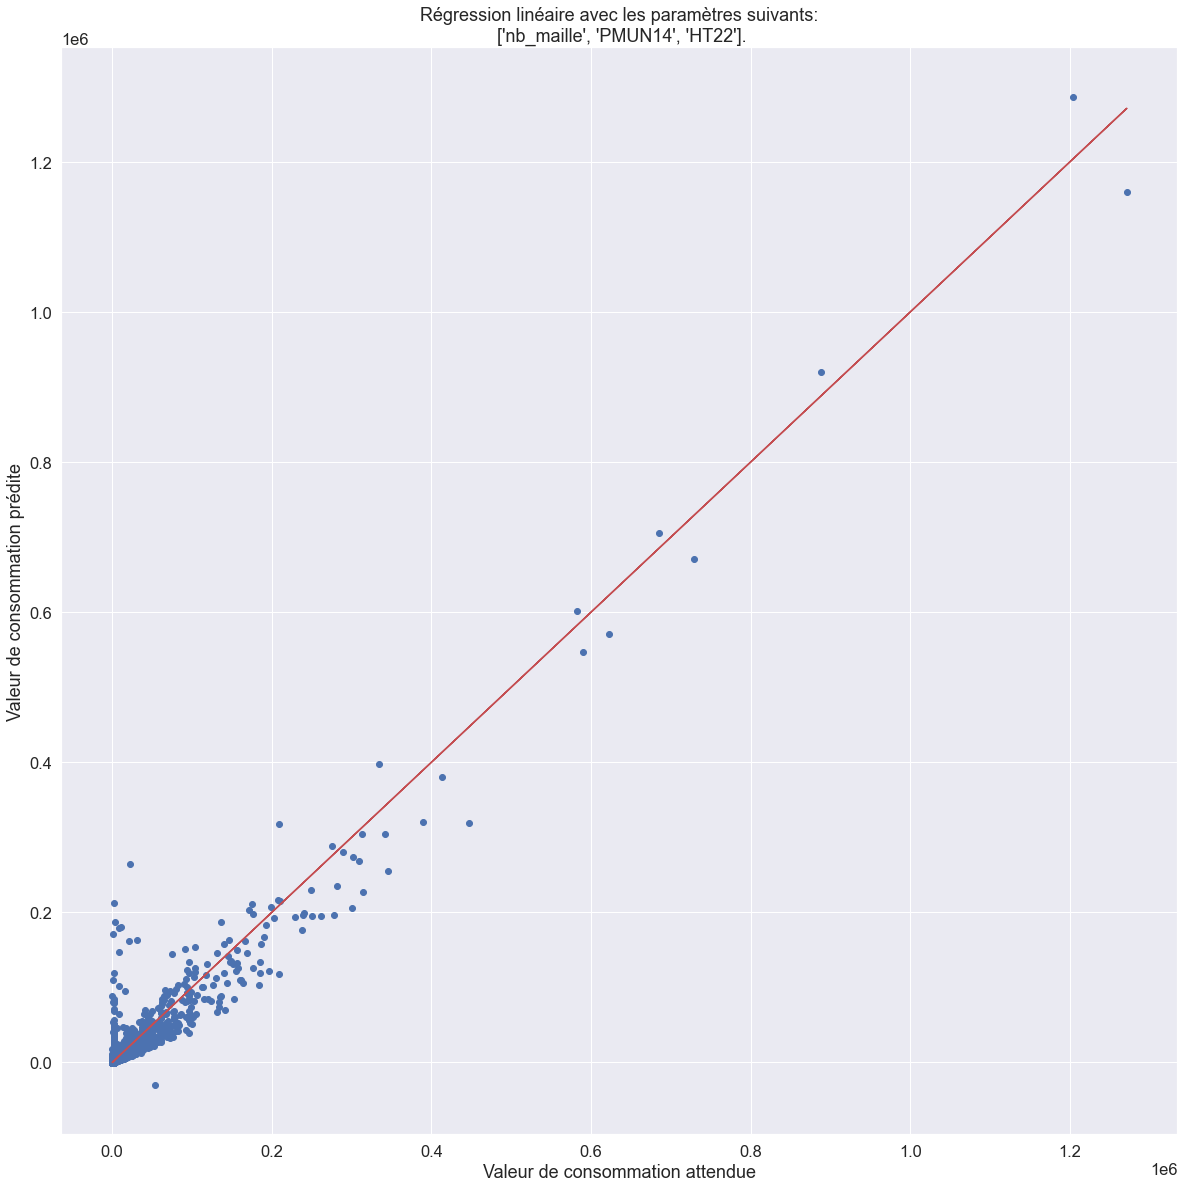

In [177]:
# Choix des variables

#list_col= ['PMUN14','pdlna','indquali','indqualr','nb_maille','HTCH222','sum_tour']

#list_col = ['indquali','nb_maille','PMUN14']
#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']



X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)



# pipeline complet
#imputer = KNNImputer(n_neighbors=2)

#transformer = FunctionTransformer(np.log)

#transformer = FunctionTransformer(np.log)

scaler = RobustScaler()

#ridge_cv_with_trans_target = TransformedTargetRegressor(
#    regressor=RidgeCV(), func=np.log1p, inverse_func=np.expm1
#).fit(X_train, y_train)
#y_pred_ridge_with_trans_target = ridge_cv_with_trans_target.predict(X_test)

#model = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp)

#pipe_linear = Pipeline([('transformer', transformer),
                  #      ('scaler', scaler),
                  #      ('regressor', model)])
        
imputer= SimpleImputer(strategy="median")

#from sklearn.linear_model import PoissonRegressor
        
        


#pipe_box = TransformedTargetRegressor(regressor=pipe, func=boxcox, inverse_func=inv_boxcox)



model=LinearRegression()


pipe = Pipeline([
    ('imputer', imputer), 
    ('scaler', RobustScaler()), 
    ('poly', PolynomialFeatures(2)),
    ('lin_reg', model)])



pipe.fit(X_train,y_train)


#### Predire les valeurs estimé par le modele sur le jeu de données X_valid
y_pred = pipe.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE vaut {round(RMSE,0)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Régression linéaire avec les paramètres suivants:\n {list_col}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')

#ax.set_ylim([0,10000])
#ax.set_xlim([0,10000])

### <span style="color:#011C5D">6.1.4 Avec sklearn : avec pipeline et cross-validation </span>


In [ ]:
data_full_2.columns.to_list()

In [ ]:
#list_col = ['pdla','indquala','indquali','indqualt','indqualr','partr','pdlna', 'indqualna',
#'nb_maille','PMUN19', 'HTCH22','sum_tour']

In [178]:
list_col= ['nb_maille','PMUN14','HT22']

['nb_maille', 'PMUN14', 'HT22']

In [179]:
# Choix des variables

#list_col= ['PMUN14',
          # 'pdlna','indquali','indqualr','nb_maille','HTCH22','sum_tour']

#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)


In [180]:

# pipeline complet


pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('poly', PolynomialFeatures(2)),
    ('scaler', RobustScaler()), 
    ('lin_reg', LinearRegression())
])

In [181]:
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures()), ('scaler', RobustScaler()),
                ('lin_reg', LinearRegression())])

In [184]:

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cv_results = cross_validate(
   pipe, X, y, cv=cv, scoring="r2", return_estimator=True, return_train_score=True )



In [185]:
# Les résultats des data de train et de test sont cohérents
cv_results=pd.DataFrame(cv_results)
cv_results.head()

fit_time  score_time                                          estimator  \
0     0.032       0.003  (SimpleImputer(strategy='median'), PolynomialF...   
1     0.068       0.000  (SimpleImputer(strategy='median'), PolynomialF...   
2     0.081       0.006  (SimpleImputer(strategy='median'), PolynomialF...   
3     0.063       0.016  (SimpleImputer(strategy='median'), PolynomialF...   
4     0.066       0.017  (SimpleImputer(strategy='median'), PolynomialF...   

   test_score  train_score  
0       0.911        0.918  
1       0.888        0.920  
2       0.911        0.910  
3       0.919        0.916  
4       0.888        0.919

### <span style="color:#011C5D"> 6.1.5 Avec sklearn : avec Ridge et Gridsearch </span>


In [188]:
list_all_col=data_full_2.columns.to_list()

In [190]:
# Choix des variables
# On prend toutes les variables en compte
list_col= list_all_col[2:-2]
list_col

['nb_maille',
 'PMUN14',
 'latitude',
 'longitude',
 'HT22',
 'HT022',
 'HT122',
 'HT222',
 'HT322',
 'HT422',
 'HT522',
 'HTCH22',
 'HTCH022',
 'HTCH122',
 'HTCH222',
 'HTCH322',
 'HTCH422',
 'HTCH522']

In [191]:
# Séparation target et variables

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# pipeline complet

ridge=Ridge()
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('poly', PolynomialFeatures(2)),
    ('scaler', RobustScaler()), 
    ('ridge', ridge)
])

In [192]:
#from sklearn.model_selection import GridSearchCV

parameters = {
    # Key = step name from pipeline + __ + hyperparameter, value = tuple of possible values
    'ridge__solver':('svd', 'cholesky', 'lsqr', 'sag'),
    'ridge__alpha': (1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1),
    'ridge__fit_intercept':[True, False],
    'ridge__normalize':[True, False]}

# Création de l'objet gridsearch object  et fit    
#gs_ridge = GridSearchCV(model, param, cv=5,verbose=2)
ridge_GS = GridSearchCV(pipe, parameters, scoring='neg_root_mean_squared_error', verbose=2)
ridge_GS.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=svd; total time=   0.7s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=svd; total time=   0.7s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=svd; total time=   0.7s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=svd; total time=   0.8s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=svd; total time=   0.7s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=cholesky; total time=   0.6s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=cholesky; total time=   0.5s
[CV] END ridge__alpha=1e-05, ridge__fit_intercept=True, ridge__normalize=True, ridge__solver=cholesky; total 

KeyboardInterrupt: 

In [ ]:
print(ridge_GS.best_estimator_.get_params()["ridge"])

In [ ]:

#### Prédiction

### Calculer de la RMSE
RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE du modèle Ridge optimisé vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Régression linéaire avec les paramètres suivants:\n {list_col}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')

## <span style="color:#011C5D">6.2 Arbres de décision et KNN </span>

### <span style="color:#011C5D">6.2.1 Arbres de décision simples</span>

In [222]:

# Choix des variables

#list_col= ['PMUN14',
        #   'pdlna','indquali','indqualr','nb_maille','HTCH222','sum_tour','latitude','longitude']

#list_col = ['indquali','nb_maille','PMUN14']

#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']


list_col= ['nb_maille','PMUN14','HT22']

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [223]:
model = DecisionTreeRegressor(max_depth=20,
                           min_samples_split=10,
                           max_leaf_nodes=20)


La RMSE du modèle Decision Tree vaut 12390.82.


Text(0, 0.5, 'Valeur de consommation prédite')

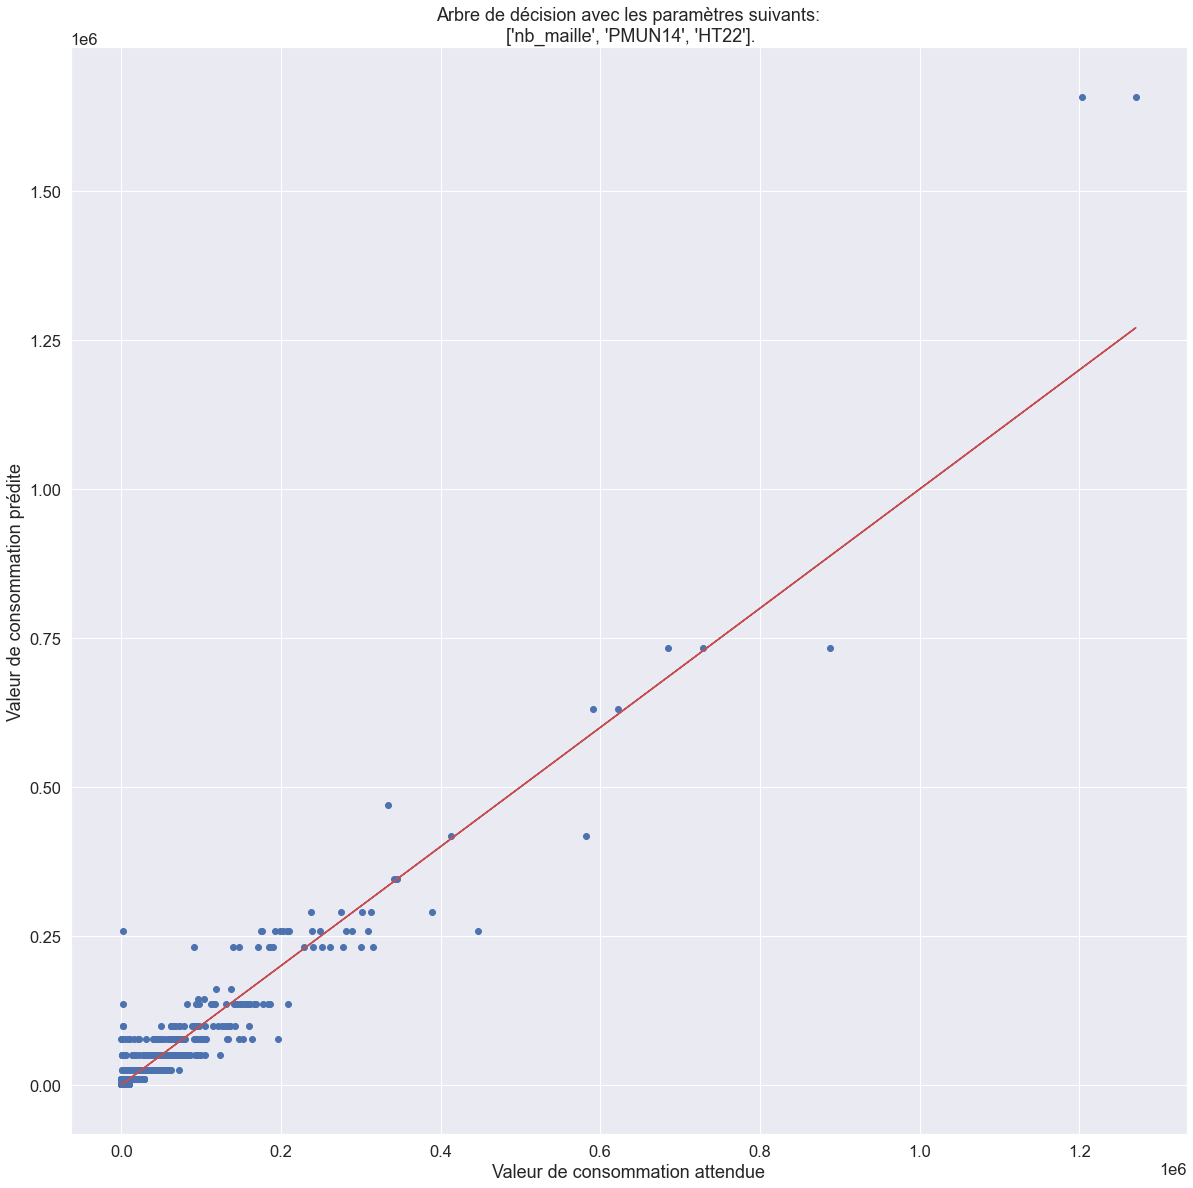

In [224]:
# pipeline complet

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('poly', PolynomialFeatures(2)),
    ('scaler', RobustScaler()), 
    ('model', model)
])

pipe.fit(X_train,y_train)

#### Predire les valeurs estimé par le modele sur le jeu de données X_valid
y_pred = pipe.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE du modèle Decision Tree vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Arbre de décision avec les paramètres suivants:\n {list_col}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')

### <span style="color:#011C5D">6.2.2 Arbres de décision: tuning hyperparamètres et cross-validation </span>

In [225]:
# Choix de variables inchangé

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [226]:
parameters = {"model__criterion": ["rmse","mae"],
              "model__min_samples_split": [10, 20, 40],
              "model__max_depth": [None],
              "model__min_samples_leaf": [20, 40, 100],
              "model__max_leaf_nodes": [5, 20, 100],
              }

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('poly', PolynomialFeatures(2)),
    ('scaler', StandardScaler()), 
    ('model', DecisionTreeRegressor())
])

In [ ]:

# define search

# Création de l'objet gridsearch object  et fit    
#gs_ridge = GridSearchCV(model, param, cv=5,verbose=2)
Tree_GS = GridSearchCV(pipe, parameters, scoring='neg_root_mean_squared_error', verbose=2)
Tree_GS.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END model__criterion=rmse, model__max_depth=None, model__max_leaf_nodes=5, model__min_samples_leaf=20, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=rmse, model__max_depth=None, model__max_leaf_nodes=5, model__min_samples_leaf=20, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=rmse, model__max_depth=None, model__max_leaf_nodes=5, model__min_samples_leaf=20, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=rmse, model__max_depth=None, model__max_leaf_nodes=5, model__min_samples_leaf=20, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=rmse, model__max_depth=None, model__max_leaf_nodes=5, model__min_samples_leaf=20, model__min_samples_split=10; total time=   0.0s
[CV] END model__criterion=rmse, model__max_depth=None, model__max_leaf_nodes=5, model__min_samples_leaf=20, model__min_samples_split=20; total time=   0.0s
[C

In [219]:
print("Les meilleurs Hyperparametres sont:\n{}".format(Tree_GS.best_params_))

Les meilleurs Hyperparametres sont:
{'model__criterion': 'mae', 'model__max_depth': None, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 20, 'model__min_samples_split': 10}


La RMSE du modèle Decision Tree vaut 14023.8.


Text(0, 0.5, 'Valeur de consommation prédite')

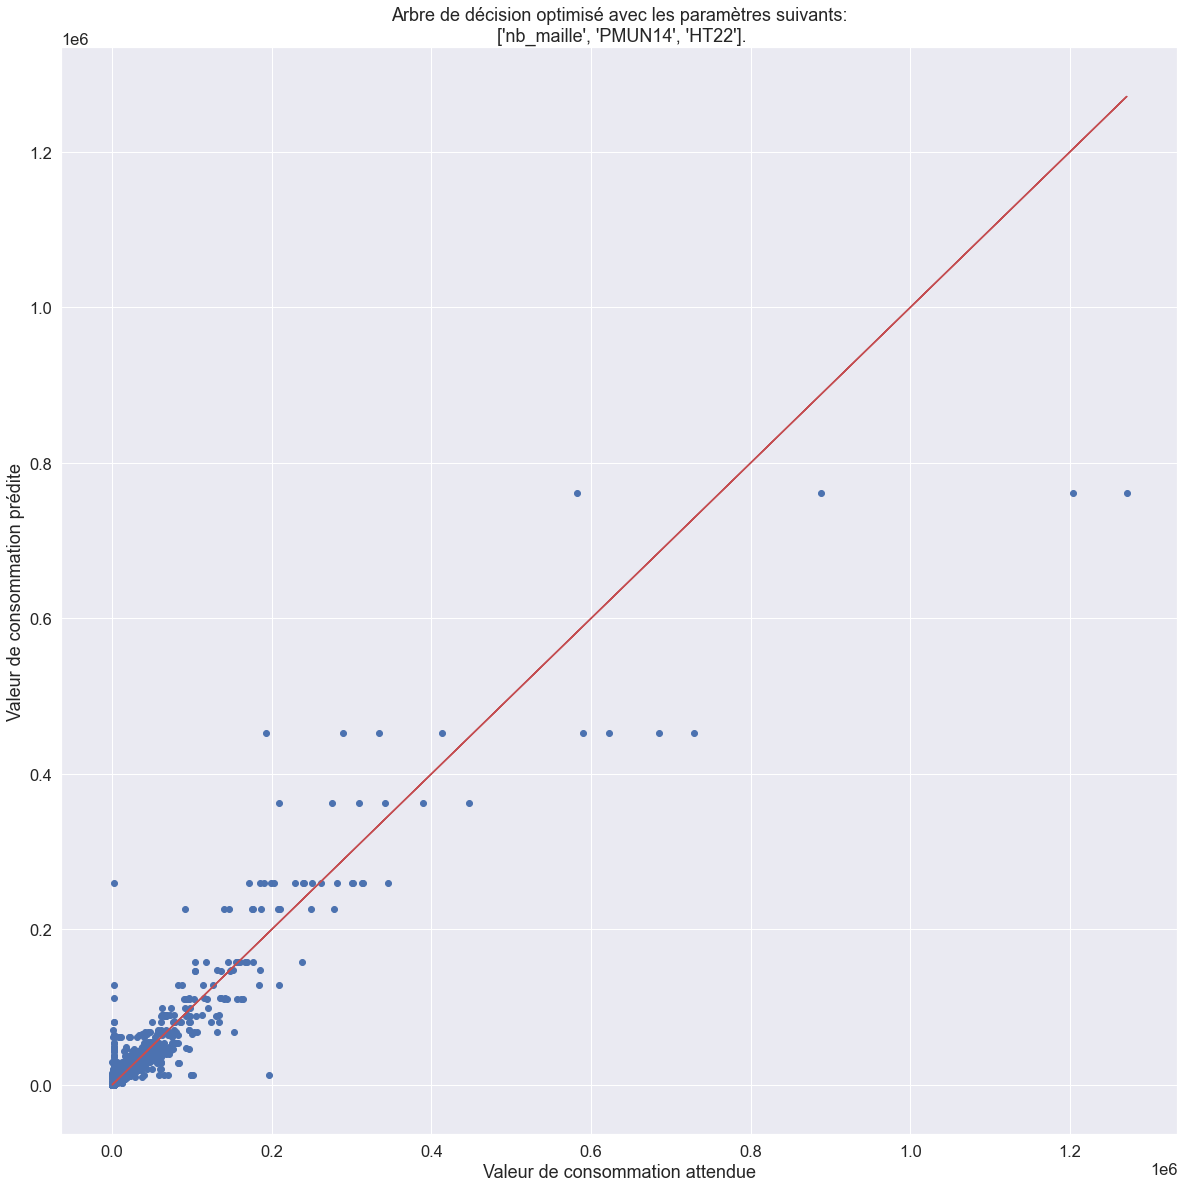

In [221]:

#### Predire les valeurs estimé par le modele sur le jeu de données X_valid
y_pred = Tree_GS.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE du modèle Decision Tree vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Arbre de décision optimisé avec les paramètres suivants:\n {list_col}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')

### <span style="color:#011C5D">6.2.3 Random Forest: tuning hyperparamètres et cross-validation </span>

In [ ]:
# Modèle random Forest
rf= RandomForestRegressor()

# Pipeline 
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()), 
    ('rf', rf)
])

# Hyperparamètres
param_grid = {
    'rf__bootstrap': [True],
    'rf__max_depth': [3, 6, 9],
    'rf__n_estimators': [100, 150, 200, 250, 300, 350, 400]
}



# Grid search
rf_GS = GridSearchCV(estimator = pipe, param_grid = param_grid, scoring='neg_root_mean_squared_error',
                                 cv = 5, verbose = 2, return_train_score=True)


In [ ]:
# Paramètres disponibles
print('Paramètres du modèle RF:\n')
print(f"{rf.get_params()}")

In [ ]:

# Choix des variables

list_col= ['PMUN14','pdlna','indquali','indqualr','nb_maille','HTCH222','sum_tour','latitude','longitude']
#list_col= ['PMUN14','indqualr','nb_maille','HTCH222']

#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']


X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=42)

# Fit du modèle
rf_GS.fit(X_train,y_train)



In [ ]:
rf_GS.best_params_

In [ ]:
rf_GS.best_estimator_

In [ ]:
#### Predire les valeurs estimées par le modele sur le jeu de données X_valid
y_pred = rf_GS.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE du modèle Random Forest optimisé vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Random Forest optimisé avec les paramètres suivants:\n {rf_GS.best_params_}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')

### <span style="color:#011C5D">6.2.4 KNN: tuning hyperparamètres et cross-validation </span>

In [193]:
# Modèle KNN
param_grid = {'knn__n_neighbors':[2,3,4,5,6]}

knn = KNeighborsRegressor()

# Pipeline 
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()), 
    ('knn', knn)
])



# Grid search
knn_GS = GridSearchCV(estimator = pipe, param_grid = param_grid, scoring='neg_root_mean_squared_error',
                                 cv = 5, verbose = 2, return_train_score=True)


In [194]:
# Paramètres disponibles
print('Paramètres du modèle KNN:\n')
print(f"{knn.get_params()}")

Paramètres du modèle KNN:

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [195]:

# Choix des variables

#list_col= ['PMUN14','pdlna','indquali','indqualr','nb_maille','HTCH222','sum_tour','latitude','longitude']
#list_col= ['PMUN14','indqualr','nb_maille','HTCH222']

#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']

list_col= ['nb_maille','PMUN14','HT22','latitude','longitude']

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=42)

# Fit du modèle
knn_GS.fit(X_train,y_train)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .................................knn__n_neighbors=2; total time=   0.1s
[CV] END .................................knn__n_neighbors=2; total time=   0.1s
[CV] END .................................knn__n_neighbors=2; total time=   0.1s
[CV] END .................................knn__n_neighbors=2; total time=   0.1s
[CV] END .................................knn__n_neighbors=2; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.2s
[CV] END .................................knn__n_neighbors=3; total time=   0.2s
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.2s
[CV] END .................................knn__n_neighbors=4; total time=   0.1s
[CV] END .................................knn__n_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [196]:
knn_GS.best_params_

{'knn__n_neighbors': 3}

In [203]:
best_model=knn_GS.best_estimator_

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()), 
    ('knn',  KNeighborsRegressor(3))
])


La RMSE du modèle KNN optimisé vaut 13688.08.


Text(0, 0.5, 'Valeur de consommation prédite')

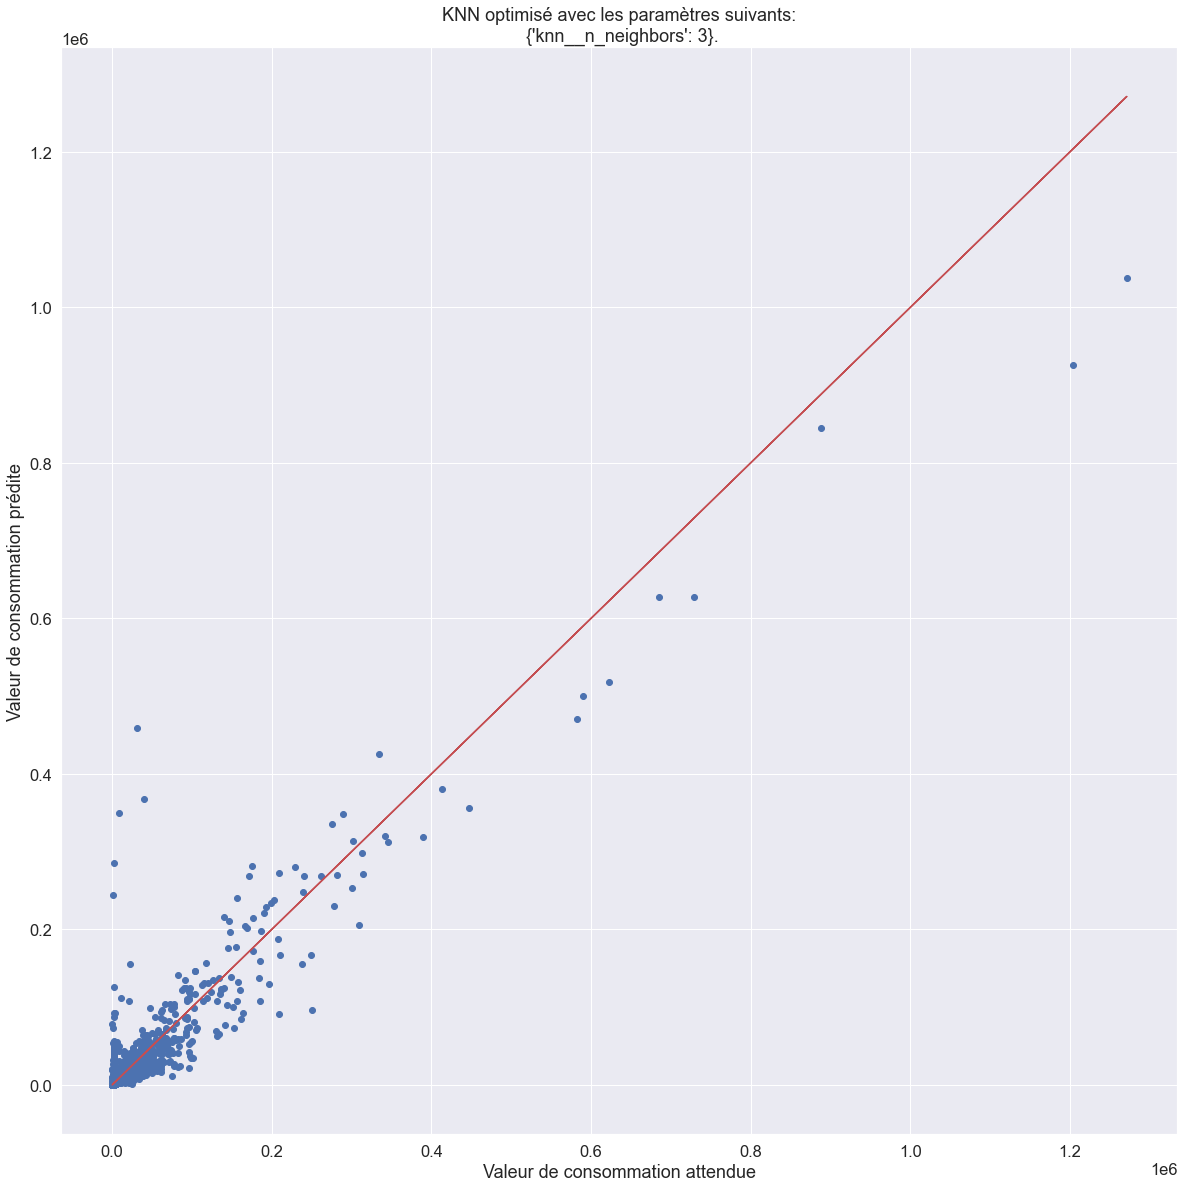

In [204]:

X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=42)

# Fit du modèle
pipe.fit(X_train,y_train)

#### Predire les valeurs estimées par le modele sur le jeu de données X_valid
y_pred = pipe.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE du modèle KNN optimisé vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'KNN optimisé avec les paramètres suivants:\n {knn_GS.best_params_}.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')

## <span style="color:#011C5D">6.3 Stacking de modèles </span>

In [ ]:

# Choix des variables

list_col= ['PMUN14','pdlna','indquali','indqualr','nb_maille','HTCH222','sum_tour','latitude','longitude']
#list_col= ['PMUN14','indqualr','nb_maille','HTCH222']

#list_col= ['PMUN14','indquali','indqualr','nb_maille','HTCH222']


X=data_full_2[list_col]

y=data_full_2['consototale']


# Séparation entre train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,random_state=42)

In [ ]:
pipe_knn = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('scaler', StandardScaler()), 
    ('model_svm', knn_GS.best_estimator_)])

pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('scaler', StandardScaler()), 
    ('model_rf', rf_GS.best_estimator_ )])


estimators = [
    ("knn", pipe_knn),
    ("rf", pipe_rf),
]

estimators = [
    ("knn", pipe_knn),
     ("rf", pipe_rf),
]

reg_stacked = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Fit du modèle stacké

reg_stacked.fit(X_train, y_train)

In [ ]:
#### Predire les valeurs estimées par le modele sur le jeu de données X_valid
y_pred = reg_stacked.predict(X_valid)

### Calculer la RMSE entre les predictions et y_valid

RMSE=np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"La RMSE du modèle stacké vaut {round(RMSE,2)}.")


# On trace la valeur prédite en fonction de la vraie  valeur
plt.figure(figsize=(20, 20))
ax=plt.subplot()
plt.scatter(y_valid, y_pred)
plt.plot(y_valid,y_valid,c='r')
ax.set_title(f'Modèle stacké avec KNN, RF et LR.')
ax.set_xlabel('Valeur de consommation attendue')
ax.set_ylabel('Valeur de consommation prédite')